<a href="https://colab.research.google.com/github/ingalegb/Test/blob/main/Data_Insider_Challenge_N%C2%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Leer los archivos de Fortune y Forbes

In [15]:
df_xlxs_forbes_2008= pd.read_excel('/content/Forbes Global 2000 - 2008 — unified industry.xlsx')
df_xlxs_forbes_2009= pd.read_excel('/content/Forbes Global 2000 - 2009 — unified industry.xlsx')
df_xlxs_forbes_2010= pd.read_excel('/content/Forbes Global 2000 - 2010 — unified industry.xlsx')
df_xlxs_forbes_2011= pd.read_excel('/content/Forbes Global 2000 - 2011 — unified industry.xlsx')
df_xlxs_forbes_2012= pd.read_excel('/content/Forbes Global 2000 - 2012 — unified industry.xlsx')
df_xlxs_forbes_2013= pd.read_excel('/content/Forbes Global 2000 - 2013 — unified industry.xlsx')
df_xlxs_forbes_2014= pd.read_excel('/content/Forbes Global 2000 - 2014 — unified industry.xlsx')
df_xlxs_forbes_2015= pd.read_excel('/content/Forbes Global 2000 - 2015 — unified industry.xlsx')
df_xlxs_forbes_2016= pd.read_excel('/content/Forbes Global 2000 - 2016 — unified industry.xlsx')
df_xlxs_forbes_2017= pd.read_excel('/content/Forbes Global 2000 - 2017 — unified industry.xlsx')
df_xlxs_forbes_2018= pd.read_excel('/content/Forbes Global 2000 - 2018 — unified industry.xlsx')
df_xlxs_forbes_2019= pd.read_excel('/content/Forbes Global 2000 - 2019 — unified industry.xlsx')
df_xlxs_forbes_2020= pd.read_excel('/content/Forbes Global 2000 - 2020 — unified industry.xlsx')
df_xlxs_forbes_2021= pd.read_excel('/content/Forbes Global 2000 - 2021 — unified industry.xlsx')
df_xlxs_forbes_2022= pd.read_excel('/content/Forbes Global 2000 - 2022 — unified industry.xlsx')

In [16]:
type(df_xlxs_forbes_2008)

pandas.core.frame.DataFrame

In [17]:
df_xlxs_forbes_2008.head()

,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value
0,1,HSBC Holdings,Banking,United Kingdom,146500.0,19130.0,2348980.0,180810.0
1,2,General Electric,Conglomerates,United States,172740.0,22210.0,795340.0,330930.0
2,3,Bank of America,Banking,United States,119190.0,14980.0,1715750.0,176530.0
3,4,JPMorgan Chase,Banking,United States,116350.0,15370.0,1562150.0,136880.0
4,5,ExxonMobil,Oil & Gas Operations,United States,358600.0,40610.0,242080.0,465510.0


In [18]:
df_html_fortune_2015= pd.read_html('/content/fortune_global_2015.html')[0]
df_html_fortune_2016= pd.read_html('/content/fortune_global_2016.html')[0]
df_html_fortune_2017= pd.read_html('/content/fortune_global_2017.html')[0]
df_html_fortune_2018= pd.read_html('/content/fortune_global_2018.html')[0]
df_html_fortune_2019= pd.read_html('/content/fortune_global_2019.html')[0]
df_html_fortune_2020= pd.read_html('/content/fortune_global_2020.html')[0]
df_html_fortune_2021= pd.read_html('/content/fortune_global_2021.html')[0]
df_html_fortune_2022= pd.read_html('/content/fortune_global_2022.html')[0]

In [19]:
type(df_html_fortune_2015)

pandas.core.frame.DataFrame

In [20]:
df_continente= pd.read_csv('/content/continente.csv')

In [21]:
type(df_continente)

pandas.core.frame.DataFrame

In [22]:
df_continente.head()

,Continent_Name,Continent_Code,Three_Letter_Country_Code,Country_Name
0,Asia,AS,AFG,"Afghanistan, Islamic Republic of"
1,Europe,EU,ALB,"Albania, Republic of"
2,Antarctica,AN,ATA,Antarctica (the territory South of 60 deg S)
3,Africa,AF,DZA,"Algeria, People's Democratic Republic of"
4,Oceania,OC,ASM,American Samoa


In [23]:
df_country_code=pd.read_csv('/content/country_code.csv')

In [24]:
type(df_country_code)

pandas.core.frame.DataFrame

In [25]:
df_country_code.head()

,Country,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND


#Abrir API

In [26]:
pip install polygon-api-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: certifi
    Found existing installation: certifi 2023.5.7
    Uninstalling certifi-2023.5.7:
      Successfully uninstalled certifi-2023.5.7


In [27]:
from polygon import RESTClient

In [28]:
api_key='MukiXJwo9fkLdsZlA5OcIU0oP2VMkeuC'

In [29]:
client = RESTClient(api_key) # api_key is used

In [30]:
from polygon.rest import models

In [31]:
from datetime import datetime
import time

In [32]:
aggs = client.get_aggs('GM',1,'day','2022-01-01','2022-12-31')
df_general= pd.DataFrame(aggs)
df_general['Ticker'] = 'GeneralMotor'
df_general['Fecha'] = pd.to_datetime(df_general['timestamp'], unit='ms')

df_hist_generalm= df_general[['Ticker','Fecha','open','close','high','low']]

In [33]:
df_hist_generalm.head()

,Ticker,Fecha,open,close,high,low
0,GeneralMotor,2022-01-03 05:00:00,59.870,61.17,61.57,59.740
1,GeneralMotor,2022-01-04 05:00:00,61.955,65.74,65.98,61.955
2,GeneralMotor,2022-01-05 05:00:00,65.520,62.74,67.21,62.600
3,GeneralMotor,2022-01-06 05:00:00,63.165,62.87,63.50,61.670
4,GeneralMotor,2022-01-07 05:00:00,63.810,62.27,63.91,61.420


In [34]:
nombres_columnas={'open':'Apertura','close':'Cierre','high':'Máximo','low':'Mínimo'}
df_general_motor= df_hist_generalm.rename(columns=nombres_columnas)
df_general_motor.head()

,Ticker,Fecha,Apertura,Cierre,Máximo,Mínimo
0,GeneralMotor,2022-01-03 05:00:00,59.870,61.17,61.57,59.740
1,GeneralMotor,2022-01-04 05:00:00,61.955,65.74,65.98,61.955
2,GeneralMotor,2022-01-05 05:00:00,65.520,62.74,67.21,62.600
3,GeneralMotor,2022-01-06 05:00:00,63.165,62.87,63.50,61.670
4,GeneralMotor,2022-01-07 05:00:00,63.810,62.27,63.91,61.420


In [35]:
df_general_motor.to_csv('/content/drive/MyDrive/df_general_motor.csv')

In [36]:
aggs = client.get_aggs('F',1,'day','2022-01-01','2022-12-31')
df_ford= pd.DataFrame(aggs)
df_ford['Ticker'] = 'Ford'
df_ford['Fecha'] = pd.to_datetime(df_ford['timestamp'], unit='ms')

df_hist_ford= df_ford[['Ticker','Fecha','open','close','high','low']]
nombres_columnas={'open':'Apertura','close':'Cierre','high':'Máximo','low':'Mínimo'}
df_ford_22= df_hist_ford.rename(columns=nombres_columnas)
df_ford_22.head()

,Ticker,Fecha,Apertura,Cierre,Máximo,Mínimo
0,Ford,2022-01-03 05:00:00,21.27,21.77,21.8800,21.06
1,Ford,2022-01-04 05:00:00,22.52,24.31,24.5576,22.42
2,Ford,2022-01-05 05:00:00,24.06,23.66,24.9500,23.47
3,Ford,2022-01-06 05:00:00,24.09,24.46,24.6200,23.36
4,Ford,2022-01-07 05:00:00,24.67,24.44,24.9100,24.04


In [37]:
df_ford_22.to_csv('/content/drive/MyDrive/df_ford_22.csv')

In [38]:
aggs = client.get_aggs('TM',1,'day','2022-01-01','2022-12-31')
df_toyota= pd.DataFrame(aggs)
df_toyota['Ticker'] = 'Toyota'
df_toyota['Fecha'] = pd.to_datetime(df_toyota['timestamp'], unit='ms')
df_hist_toyota= df_toyota[['Ticker','Fecha','open','close','high','low']]
nombres_columnas={'open':'Apertura','close':'Cierre','high':'Máximo','low':'Mínimo'}
df_toyota_22= df_hist_toyota.rename(columns=nombres_columnas)
df_toyota_22.head()

,Ticker,Fecha,Apertura,Cierre,Máximo,Mínimo
0,Toyota,2022-01-03 05:00:00,186.81,186.29,187.4632,185.16
1,Toyota,2022-01-04 05:00:00,193.08,199.19,201.4300,192.32
2,Toyota,2022-01-05 05:00:00,199.80,196.95,201.3382,196.85
3,Toyota,2022-01-06 05:00:00,200.63,199.75,200.8000,196.18
4,Toyota,2022-01-07 05:00:00,200.68,200.44,201.9900,198.72


In [39]:
df_toyota_22.to_csv('/content/drive/MyDrive/df_toyota_22.csv')

In [40]:
aggs = client.get_aggs('HMC',1,'day','2022-01-01','2022-12-31')
df_honda= pd.DataFrame(aggs)
df_honda['Ticker'] = 'Honda'
df_honda['Fecha'] = pd.to_datetime(df_honda['timestamp'], unit='ms')
df_hist_honda= df_honda[['Ticker','Fecha','open','close','high','low']]
nombres_columnas={'open':'Apertura','close':'Cierre','high':'Máximo','low':'Mínimo'}
df_honda_22= df_hist_honda.rename(columns=nombres_columnas)
df_honda_22.head()

,Ticker,Fecha,Apertura,Cierre,Máximo,Mínimo
0,Honda,2022-01-03 05:00:00,28.62,28.82,28.9050,28.62
1,Honda,2022-01-04 05:00:00,28.90,29.49,29.7350,28.87
2,Honda,2022-01-05 05:00:00,29.64,29.27,29.8000,29.27
3,Honda,2022-01-06 05:00:00,29.69,29.73,29.7999,29.37
4,Honda,2022-01-07 05:00:00,29.76,29.75,29.7900,29.53


In [41]:
df_honda_22.to_csv('/content/drive/MyDrive/df_honda_22.csv')

In [42]:
aggs = client.get_aggs('NSANY',1,'day','2022-01-01','2022-12-31')
df_nissan= pd.DataFrame(aggs)
df_nissan['Ticker'] = 'Nissan'
df_nissan['Fecha'] = pd.to_datetime(df_nissan['timestamp'], unit='ms')
df_hist_nissan= df_nissan[['Ticker','Fecha','open','close','high','low']]
nombres_columnas={'open':'Apertura','close':'Cierre','high':'Máximo','low':'Mínimo'}
df_nissan_22= df_hist_nissan.rename(columns=nombres_columnas)
df_nissan_22.head()

,Ticker,Fecha,Apertura,Cierre,Máximo,Mínimo
0,Nissan,2022-01-03 05:00:00,9.99,9.65,10.00,9.62
1,Nissan,2022-01-04 05:00:00,10.16,10.23,10.24,10.16
2,Nissan,2022-01-05 05:00:00,10.45,10.69,10.69,10.45
3,Nissan,2022-01-06 05:00:00,10.66,10.71,10.71,10.64
4,Nissan,2022-01-07 05:00:00,10.92,10.79,10.92,10.77


In [43]:
df_nissan_22.to_csv('/content/drive/MyDrive/df_nissan_22.csv')

#1) A- Cambiar nombres de columnas de Forbes 2000

In [44]:
df_xlxs_forbes_2008.head()

,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value
0,1,HSBC Holdings,Banking,United Kingdom,146500.0,19130.0,2348980.0,180810.0
1,2,General Electric,Conglomerates,United States,172740.0,22210.0,795340.0,330930.0
2,3,Bank of America,Banking,United States,119190.0,14980.0,1715750.0,176530.0
3,4,JPMorgan Chase,Banking,United States,116350.0,15370.0,1562150.0,136880.0
4,5,ExxonMobil,Oil & Gas Operations,United States,358600.0,40610.0,242080.0,465510.0


In [45]:
df_xlxs_forbes_2008.shape

(2000, 8)

In [46]:
df_xlxs_forbes_2008.columns

Index(['Rank_nr', 'Company', 'Industry', 'Country', 'Sales', 'Profits',
       'Assets', 'Market_Value'],
      dtype='object')

In [47]:
nombres_col= {'Rank_nr':'Ranking',
              'Company':'Empresa',
              'Industry':'Industria',
              'Country':'Pais',
              'Sales':'Ingresos',
              'Profits':'Ganancias',
              'Assets':'Activos',
              'Market_Value':'Valor de Mercado'}


In [48]:
df_forbes_2008= df_xlxs_forbes_2008.rename(columns=nombres_col)
df_forbes_2009= df_xlxs_forbes_2009.rename(columns=nombres_col)
df_forbes_2010= df_xlxs_forbes_2010.rename(columns=nombres_col)
df_forbes_2011= df_xlxs_forbes_2011.rename(columns=nombres_col)
df_forbes_2012= df_xlxs_forbes_2012.rename(columns=nombres_col)
df_forbes_2013= df_xlxs_forbes_2013.rename(columns=nombres_col)
df_forbes_2014= df_xlxs_forbes_2014.rename(columns=nombres_col)
df_forbes_2015= df_xlxs_forbes_2015.rename(columns=nombres_col)
df_forbes_2016= df_xlxs_forbes_2016.rename(columns=nombres_col)
df_forbes_2017= df_xlxs_forbes_2017.rename(columns=nombres_col)
df_forbes_2018= df_xlxs_forbes_2018.rename(columns=nombres_col)
df_forbes_2019= df_xlxs_forbes_2019.rename(columns=nombres_col)
df_forbes_2020= df_xlxs_forbes_2020.rename(columns=nombres_col)
df_forbes_2021= df_xlxs_forbes_2021.rename(columns=nombres_col)
df_forbes_2022= df_xlxs_forbes_2022.rename(columns=nombres_col)

In [49]:
df_forbes_2015.head()

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado
0,1,ICBC,Banking,China,166796.0,44757.2,3322043.0,278327
1,2,China Construction Bank,Banking,China,130473.0,37038.9,2698925.0,212945
2,3,Agricultural Bank of China,Banking,China,129221.0,29124.5,2574815.0,189879
3,4,Bank of China,Banking,China,120297.0,27526.8,2458336.0,199130
4,5,Berkshire Hathaway,Diversified Financials,United States,194673.0,19872.0,534618.0,354813


In [50]:
df_forbes_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ranking           2000 non-null   int64  
 1   Empresa           2000 non-null   object 
 2   Industria         2000 non-null   object 
 3   Pais              2000 non-null   object 
 4   Ingresos          1998 non-null   float64
 5   Ganancias         2000 non-null   float64
 6   Activos           1999 non-null   float64
 7   Valor de Mercado  2000 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 125.1+ KB


#1)B- Agregar columnas de Margen de Rentabilidad, Activos (ROA) y Año

In [51]:
df_forbes_2015['Margen de Rentabilidad']=((df_forbes_2015['Ganancias']/ df_forbes_2015['Ingresos'])*100).round(2)
df_forbes_2016['Margen de Rentabilidad']=((df_forbes_2016['Ganancias']/ df_forbes_2016['Ingresos'])*100).round(2)
df_forbes_2017['Margen de Rentabilidad']=((df_forbes_2017['Ganancias']/ df_forbes_2017['Ingresos'])*100).round(2)
df_forbes_2018['Margen de Rentabilidad']=((df_forbes_2018['Ganancias']/ df_forbes_2018['Ingresos'])*100).round(2)
df_forbes_2019['Margen de Rentabilidad']=((df_forbes_2019['Ganancias']/ df_forbes_2019['Ingresos'])*100).round(2)
df_forbes_2020['Margen de Rentabilidad']=((df_forbes_2020['Ganancias']/ df_forbes_2020['Ingresos'])*100).round(2)
df_forbes_2021['Margen de Rentabilidad']=((df_forbes_2021['Ganancias']/ df_forbes_2021['Ingresos'])*100).round(2)
df_forbes_2022['Margen de Rentabilidad']=((df_forbes_2022['Ganancias']/ df_forbes_2022['Ingresos'])*100).round(2)

In [52]:
df_forbes_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 2000 non-null   object 
 1   Empresa                 2000 non-null   object 
 2   Industria               2000 non-null   object 
 3   Pais                    2000 non-null   object 
 4   Ingresos                2000 non-null   int64  
 5   Ganancias               2000 non-null   float64
 6   Activos                 2000 non-null   int64  
 7   Valor de Mercado        2000 non-null   int64  
 8   Margen de Rentabilidad  2000 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 140.8+ KB


In [53]:
df_forbes_2015['ROA %']=((df_forbes_2015['Ganancias']/ df_forbes_2015['Activos'])*100).round(2)
df_forbes_2016['ROA %']=((df_forbes_2016['Ganancias']/ df_forbes_2016['Activos'])*100).round(2)
df_forbes_2017['ROA %']=((df_forbes_2017['Ganancias']/ df_forbes_2017['Activos'])*100).round(2)
df_forbes_2018['ROA %']=((df_forbes_2018['Ganancias']/ df_forbes_2018['Activos'])*100).round(2)
df_forbes_2019['ROA %']=((df_forbes_2019['Ganancias']/ df_forbes_2019['Activos'])*100).round(2)
df_forbes_2020['ROA %']=((df_forbes_2020['Ganancias']/ df_forbes_2020['Activos'])*100).round(2)
df_forbes_2021['ROA %']=((df_forbes_2021['Ganancias']/ df_forbes_2021['Activos'])*100).round(2)
df_forbes_2022['ROA %']=((df_forbes_2022['Ganancias']/ df_forbes_2022['Activos'])*100).round(2)


In [54]:
df_forbes_2015.Ingresos.fillna(0, inplace= True)
df_forbes_2015['Valor de Mercado'].fillna(0, inplace= True)
df_forbes_2015['Margen de Rentabilidad'].fillna(0, inplace= True)
df_forbes_2015['ROA %'].fillna(0, inplace= True)
df_forbes_2015.Activos.fillna(0, inplace= True)
df_forbes_2015.Ganancias.fillna(0, inplace= True)
df_forbes_2016.Ingresos.fillna(0, inplace= True)
df_forbes_2016.Activos.fillna(0, inplace= True)
df_forbes_2016['Valor de Mercado'].fillna(0, inplace= True)
df_forbes_2016['Margen de Rentabilidad'].fillna(0, inplace= True)
df_forbes_2016['ROA %'].fillna(0, inplace= True)
df_forbes_2016.Ganancias.fillna(0, inplace= True)
df_forbes_2017.Ingresos.fillna(0, inplace= True)
df_forbes_2017.Activos.fillna(0, inplace= True)
df_forbes_2017.Ganancias.fillna(0, inplace= True)
df_forbes_2017['Valor de Mercado'].fillna(0, inplace= True)
df_forbes_2017['Margen de Rentabilidad'].fillna(0, inplace= True)
df_forbes_2017['ROA %'].fillna(0, inplace= True)
df_forbes_2018.Ingresos.fillna(0, inplace= True)
df_forbes_2018.Activos.fillna(0, inplace= True)
df_forbes_2018.Ganancias.fillna(0, inplace= True)
df_forbes_2018['Valor de Mercado'].fillna(0, inplace= True)
df_forbes_2018['Margen de Rentabilidad'].fillna(0, inplace= True)
df_forbes_2018['ROA %'].fillna(0, inplace= True)
df_forbes_2019.Ingresos.fillna(0, inplace= True)
df_forbes_2019.Activos.fillna(0, inplace= True)
df_forbes_2019.Ganancias.fillna(0, inplace= True)
df_forbes_2019['Valor de Mercado'].fillna(0, inplace= True)
df_forbes_2019['Margen de Rentabilidad'].fillna(0, inplace= True)
df_forbes_2019['ROA %'].fillna(0, inplace= True)
df_forbes_2020.Ingresos.fillna(0, inplace= True)
df_forbes_2020.Activos.fillna(0, inplace= True)
df_forbes_2020.Ganancias.fillna(0, inplace= True)
df_forbes_2020['Valor de Mercado'].fillna(0, inplace= True)
df_forbes_2020['Margen de Rentabilidad'].fillna(0, inplace= True)
df_forbes_2020['ROA %'].fillna(0, inplace= True)
df_forbes_2021.Ingresos.fillna(0, inplace= True)
df_forbes_2021.Activos.fillna(0, inplace= True)
df_forbes_2021.Ganancias.fillna(0, inplace= True)
df_forbes_2021['Valor de Mercado'].fillna(0, inplace= True)
df_forbes_2021['Margen de Rentabilidad'].fillna(0, inplace= True)
df_forbes_2021['ROA %'].fillna(0, inplace= True)
df_forbes_2022.Ingresos.fillna(0, inplace= True)
df_forbes_2022.Activos.fillna(0, inplace= True)
df_forbes_2022.Ganancias.fillna(0, inplace= True)
df_forbes_2022['Valor de Mercado'].fillna(0, inplace= True)
df_forbes_2022['Margen de Rentabilidad'].fillna(0, inplace= True)
df_forbes_2022['ROA %'].fillna(0, inplace= True)

In [55]:
forbes_2008 = len(df_forbes_2008)
for i in range(forbes_2008):
  df_forbes_2008['Año']= 2008
  df_forbes_2009['Año']= 2009
  df_forbes_2010['Año']= 2010
  df_forbes_2011['Año']= 2011
  df_forbes_2012['Año']= 2012
  df_forbes_2013['Año']= 2013
  df_forbes_2014['Año']= 2014
  df_forbes_2015['Año']= 2015
  df_forbes_2016['Año']= 2016
  df_forbes_2017['Año']= 2017
  df_forbes_2018['Año']= 2018
  df_forbes_2019['Año']= 2019
  df_forbes_2020['Año']= 2020
  df_forbes_2021['Año']= 2021
  df_forbes_2022['Año']= 2022


In [56]:
df_forbes_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 2000 non-null   int64  
 1   Empresa                 2000 non-null   object 
 2   Industria               2000 non-null   object 
 3   Pais                    2000 non-null   object 
 4   Ingresos                2000 non-null   float64
 5   Ganancias               2000 non-null   float64
 6   Activos                 2000 non-null   float64
 7   Valor de Mercado        2000 non-null   int64  
 8   Margen de Rentabilidad  2000 non-null   float64
 9   ROA %                   2000 non-null   float64
 10  Año                     2000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 172.0+ KB


In [57]:
df_forbes_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 1999 non-null   int64  
 1   Empresa                 1999 non-null   object 
 2   Industria               1999 non-null   object 
 3   Pais                    1999 non-null   object 
 4   Ingresos                1999 non-null   float64
 5   Ganancias               1999 non-null   float64
 6   Activos                 1999 non-null   float64
 7   Valor de Mercado        1999 non-null   float64
 8   Margen de Rentabilidad  1999 non-null   float64
 9   ROA %                   1999 non-null   float64
 10  Año                     1999 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 171.9+ KB


In [58]:
df_forbes_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 1999 non-null   int64  
 1   Empresa                 1999 non-null   object 
 2   Industria               1999 non-null   object 
 3   Pais                    1999 non-null   object 
 4   Ingresos                1999 non-null   float64
 5   Ganancias               1999 non-null   float64
 6   Activos                 1999 non-null   float64
 7   Valor de Mercado        1999 non-null   float64
 8   Margen de Rentabilidad  1999 non-null   float64
 9   ROA %                   1999 non-null   float64
 10  Año                     1999 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 171.9+ KB


In [59]:
df_forbes_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 2000 non-null   int64  
 1   Empresa                 2000 non-null   object 
 2   Industria               2000 non-null   object 
 3   Pais                    2000 non-null   object 
 4   Ingresos                2000 non-null   float64
 5   Ganancias               2000 non-null   float64
 6   Activos                 2000 non-null   float64
 7   Valor de Mercado        2000 non-null   float64
 8   Margen de Rentabilidad  2000 non-null   float64
 9   ROA %                   2000 non-null   float64
 10  Año                     2000 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 172.0+ KB


In [60]:
df_forbes_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 2000 non-null   int64  
 1   Empresa                 2000 non-null   object 
 2   Industria               2000 non-null   object 
 3   Pais                    2000 non-null   object 
 4   Ingresos                2000 non-null   float64
 5   Ganancias               2000 non-null   float64
 6   Activos                 2000 non-null   float64
 7   Valor de Mercado        2000 non-null   float64
 8   Margen de Rentabilidad  2000 non-null   float64
 9   ROA %                   2000 non-null   float64
 10  Año                     2000 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 172.0+ KB


In [61]:
df_forbes_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 2000 non-null   int64  
 1   Empresa                 2000 non-null   object 
 2   Industria               2000 non-null   object 
 3   Pais                    2000 non-null   object 
 4   Ingresos                2000 non-null   int64  
 5   Ganancias               2000 non-null   float64
 6   Activos                 2000 non-null   int64  
 7   Valor de Mercado        2000 non-null   int64  
 8   Margen de Rentabilidad  2000 non-null   float64
 9   ROA %                   2000 non-null   float64
 10  Año                     2000 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 172.0+ KB


In [62]:
df_forbes_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 2000 non-null   object 
 1   Empresa                 2000 non-null   object 
 2   Industria               2000 non-null   object 
 3   Pais                    2000 non-null   object 
 4   Ingresos                2000 non-null   int64  
 5   Ganancias               2000 non-null   float64
 6   Activos                 2000 non-null   float64
 7   Valor de Mercado        2000 non-null   int64  
 8   Margen de Rentabilidad  2000 non-null   float64
 9   ROA %                   2000 non-null   float64
 10  Año                     2000 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 172.0+ KB


In [63]:
df_forbes_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 2000 non-null   object 
 1   Empresa                 2000 non-null   object 
 2   Industria               2000 non-null   object 
 3   Pais                    2000 non-null   object 
 4   Ingresos                2000 non-null   int64  
 5   Ganancias               2000 non-null   float64
 6   Activos                 2000 non-null   int64  
 7   Valor de Mercado        2000 non-null   int64  
 8   Margen de Rentabilidad  2000 non-null   float64
 9   ROA %                   2000 non-null   float64
 10  Año                     2000 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 172.0+ KB


#2) Cambiar nombres de columnas y agregar en Fortune 500

In [64]:
df_html_fortune_2015.head()

,RemoveRank,RemoveName,RemoveRevenues,RemoveRevenue Percent Change,RemoveProfits,RemoveAssets,RemoveEmployees
0,1,Walmart,48565100,2.0%,16363,20370600,2200000
1,2,Sinopec Group,44681100,-2.3%,5177,35918220,897488
2,3,Royal Dutch Shell,43134400,-6.1%,14874,35311600,94000
3,4,China National Petroleum,42862000,-0.8%,163595,63481150,1636532
4,5,Exxon Mobil,38259700,-6.1%,32520,34949300,83700


In [65]:
df_html_fortune_2015.columns

Index(['RemoveRank', 'RemoveName', 'RemoveRevenues',
       'RemoveRevenue Percent Change', 'RemoveProfits', 'RemoveAssets',
       'RemoveEmployees'],
      dtype='object')

In [66]:
nombres_col_fortune={ 'RemoveRank': 'Ranking',
                      'RemoveName': 'Empresa',
                      'RemoveRevenues':'Ingresos',
                      'RemoveRevenue Percent Change':'Cambio % de Ingresos',
                      'RemoveProfits':'Beneficios',
                      'RemoveAssets': 'Activos',
                      'RemoveEmployees':'Empleados'}

In [67]:
df_fortune_2015= df_html_fortune_2015.rename(columns=nombres_col_fortune)

In [68]:
df_fortune_2015.head()

,Ranking,Empresa,Ingresos,Cambio % de Ingresos,Beneficios,Activos,Empleados
0,1,Walmart,48565100,2.0%,16363,20370600,2200000
1,2,Sinopec Group,44681100,-2.3%,5177,35918220,897488
2,3,Royal Dutch Shell,43134400,-6.1%,14874,35311600,94000
3,4,China National Petroleum,42862000,-0.8%,163595,63481150,1636532
4,5,Exxon Mobil,38259700,-6.1%,32520,34949300,83700


In [69]:
df_fortune_2016= df_html_fortune_2016.rename(columns=nombres_col_fortune)
df_fortune_2017= df_html_fortune_2017.rename(columns=nombres_col_fortune)
df_fortune_2018= df_html_fortune_2018.rename(columns=nombres_col_fortune)
df_fortune_2019= df_html_fortune_2019.rename(columns=nombres_col_fortune)
df_fortune_2020= df_html_fortune_2020.rename(columns=nombres_col_fortune)
df_fortune_2021= df_html_fortune_2021.rename(columns=nombres_col_fortune)
df_fortune_2022= df_html_fortune_2022.rename(columns=nombres_col_fortune)

In [70]:
df_fortune_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Ranking               500 non-null    int64 
 1   Empresa               500 non-null    object
 2   Empleados             500 non-null    int64 
 3   RemoveRevenues ($M)   500 non-null    object
 4   Cambio % de Ingresos  500 non-null    object
 5   RemoveProfits ($M)    500 non-null    object
 6   RemoveAssets ($M)     500 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.5+ KB


In [71]:
fortune_500= len(df_fortune_2016)
for i in range(fortune_500):
  df_fortune_2015['Año']= 2015
  df_fortune_2016['Año']= 2016
  df_fortune_2017['Año']= 2017
  df_fortune_2018['Año']= 2018
  df_fortune_2019['Año']= 2019
  df_fortune_2020['Año']= 2020
  df_fortune_2021['Año']= 2021
  df_fortune_2022['Año']= 2022


In [72]:
df_fortune_2015_f = df_fortune_2015.iloc[:, [1,6,7]]
df_fortune_2015_f


,Empresa,Empleados,Año
0,Walmart,2200000,2015
1,Sinopec Group,897488,2015
2,Royal Dutch Shell,94000,2015
3,China National Petroleum,1636532,2015
4,Exxon Mobil,83700,2015
...,...,...,...
495,Capital One Financial,46000,2015
496,AntarChile,24031,2015
497,Rolls-Royce Holdings,54100,2015
498,Cosmo Oil,6359,2015


#3)Cambiar nombre columnas de DF Countrys y Continentes

In [73]:
df_continente.head()

,Continent_Name,Continent_Code,Three_Letter_Country_Code,Country_Name
0,Asia,AS,AFG,"Afghanistan, Islamic Republic of"
1,Europe,EU,ALB,"Albania, Republic of"
2,Antarctica,AN,ATA,Antarctica (the territory South of 60 deg S)
3,Africa,AF,DZA,"Algeria, People's Democratic Republic of"
4,Oceania,OC,ASM,American Samoa


In [74]:
df_continente.columns

Index(['Continent_Name', 'Continent_Code', 'Three_Letter_Country_Code',
       'Country_Name'],
      dtype='object')

In [75]:
nombres_col_cont={'Continent_Name':'Continente',
                  'Continent_Code':'Código Continente',
                  'Three_Letter_Country_Code':'CodPais',
                  'Country_Name':'NombrePais'}

In [76]:
df_contin= df_continente.rename(columns=nombres_col_cont)
df_contin

,Continente,Código Continente,CodPais,NombrePais
0,Asia,AS,AFG,"Afghanistan, Islamic Republic of"
1,Europe,EU,ALB,"Albania, Republic of"
2,Antarctica,AN,ATA,Antarctica (the territory South of 60 deg S)
3,Africa,AF,DZA,"Algeria, People's Democratic Republic of"
4,Oceania,OC,ASM,American Samoa
...,...,...,...,...
253,South America,SA,VEN,"Venezuela, Bolivarian Republic of"
254,Oceania,OC,WLF,Wallis and Futuna
255,Oceania,OC,WSM,"Samoa, Independent State of"
256,Asia,AS,YEM,Yemen


In [77]:
df_country_code.columns

Index(['Country', 'Code'], dtype='object')

In [78]:
nombres_col_country={
    'Country': 'Pais',
    'Code': 'CodPais'
}

In [79]:
df_country= df_country_code.rename(columns=nombres_col_country)
df_country

,Pais,CodPais
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
...,...,...
217,Virgin Islands,VGB
218,West Bank,WBG
219,Yemen,YEM
220,Zambia,ZMB


##JUNCION DE TABLAS Y DATOS EXPLORATORIOS


#1) Concatenación DF principal y secundarios

In [80]:
df_forbes_2015_22=pd.concat( [df_forbes_2015, df_forbes_2016, df_forbes_2017, df_forbes_2018, df_forbes_2019, df_forbes_2020, df_forbes_2021, df_forbes_2022])

In [81]:
df_forbes_2015_22.shape

(15998, 11)

In [82]:
df_forbes_2015_22

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año
0,1,ICBC,Banking,China,166796.0,44757.2,3322043.0,278327.0,26.83,1.35,2015
1,2,China Construction Bank,Banking,China,130473.0,37038.9,2698925.0,212945.0,28.39,1.37,2015
2,3,Agricultural Bank of China,Banking,China,129221.0,29124.5,2574815.0,189879.0,22.54,1.13,2015
3,4,Bank of China,Banking,China,120297.0,27526.8,2458336.0,199130.0,22.88,1.12,2015
4,5,Berkshire Hathaway,Diversified Financials,United States,194673.0,19872.0,534618.0,354813.0,10.21,3.72,2015
...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Shenzhen Feima International Supply Chain,Business Services & Supplies,China,37.0,1408.3,166.0,1136.0,3806.22,848.37,2022
1996,1997,NMDC,Materials,India,3520.0,1406.4,5715.0,6401.0,39.95,24.61,2022
1997,1997,Sichuan Changhong Electric,Consumer Durables,China,15716.0,53.1,12105.0,1957.0,0.34,0.44,2022
1998,1999,Satellite Chemical,Chemicals,China,4413.0,931.3,7640.0,9521.0,21.10,12.19,2022


In [83]:
df_forbes_2015_22.shape[0]


15998

In [84]:
df_forbes_2015_22.index = range(df_forbes_2015_22.shape[0])

In [85]:
df_forbes_2015_22

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año
0,1,ICBC,Banking,China,166796.0,44757.2,3322043.0,278327.0,26.83,1.35,2015
1,2,China Construction Bank,Banking,China,130473.0,37038.9,2698925.0,212945.0,28.39,1.37,2015
2,3,Agricultural Bank of China,Banking,China,129221.0,29124.5,2574815.0,189879.0,22.54,1.13,2015
3,4,Bank of China,Banking,China,120297.0,27526.8,2458336.0,199130.0,22.88,1.12,2015
4,5,Berkshire Hathaway,Diversified Financials,United States,194673.0,19872.0,534618.0,354813.0,10.21,3.72,2015
...,...,...,...,...,...,...,...,...,...,...,...
15993,1995,Shenzhen Feima International Supply Chain,Business Services & Supplies,China,37.0,1408.3,166.0,1136.0,3806.22,848.37,2022
15994,1997,NMDC,Materials,India,3520.0,1406.4,5715.0,6401.0,39.95,24.61,2022
15995,1997,Sichuan Changhong Electric,Consumer Durables,China,15716.0,53.1,12105.0,1957.0,0.34,0.44,2022
15996,1999,Satellite Chemical,Chemicals,China,4413.0,931.3,7640.0,9521.0,21.10,12.19,2022


In [86]:
df_contin[df_contin['Código Continente'].isnull()].head(10)

,Continente,Código Continente,CodPais,NombrePais
7,North America,NaN,ATG,Antigua and Barbuda
13,North America,NaN,BHS,"Bahamas, Commonwealth of the"
18,North America,NaN,BRB,Barbados
20,North America,NaN,BMU,Bermuda
27,North America,NaN,BLZ,Belize
30,North America,NaN,VGB,British Virgin Islands
38,North America,NaN,CAN,Canada
40,North America,NaN,CYM,Cayman Islands
55,North America,NaN,CRI,"Costa Rica, Republic of"
57,North America,NaN,CUB,"Cuba, Republic of"


In [87]:
df_contin= df_contin.fillna({'Código Continente':'NA'})
df_contin.head(50)

,Continente,Código Continente,CodPais,NombrePais
0,Asia,AS,AFG,"Afghanistan, Islamic Republic of"
1,Europe,EU,ALB,"Albania, Republic of"
2,Antarctica,AN,ATA,Antarctica (the territory South of 60 deg S)
3,Africa,AF,DZA,"Algeria, People's Democratic Republic of"
4,Oceania,OC,ASM,American Samoa
5,Europe,EU,AND,"Andorra, Principality of"
6,Africa,AF,AGO,"Angola, Republic of"
7,North America,NA,ATG,Antigua and Barbuda
8,Europe,EU,AZE,"Azerbaijan, Republic of"
9,Asia,AS,AZE,"Azerbaijan, Republic of"


In [88]:
df_country_contin= df_country.merge(df_contin, how='inner')
df_country_contin

,Pais,CodPais,Continente,Código Continente,NombrePais
0,Afghanistan,AFG,Asia,AS,"Afghanistan, Islamic Republic of"
1,Albania,ALB,Europe,EU,"Albania, Republic of"
2,Algeria,DZA,Africa,AF,"Algeria, People's Democratic Republic of"
3,American Samoa,ASM,Oceania,OC,American Samoa
4,Andorra,AND,Europe,EU,"Andorra, Principality of"
...,...,...,...,...,...
221,Venezuela,VEN,South America,SA,"Venezuela, Bolivarian Republic of"
222,Vietnam,VNM,Asia,AS,"Vietnam, Socialist Republic of"
223,Yemen,YEM,Asia,AS,Yemen
224,Zambia,ZMB,Africa,AF,"Zambia, Republic of"


In [89]:
df_country_contin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pais               226 non-null    object
 1   CodPais            226 non-null    object
 2   Continente         226 non-null    object
 3   Código Continente  226 non-null    object
 4   NombrePais         226 non-null    object
dtypes: object(5)
memory usage: 10.6+ KB


In [90]:
df_country_contin['Pais'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Virgin Islands', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Democratic Republic of the', 'Congo, Republic of the',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       

In [91]:
df_country_contin['Pais']=df_country_contin['Pais'].replace('Korea, South', 'South Korea')

In [92]:
df_country_contin['Pais'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Virgin Islands', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Democratic Republic of the', 'Congo, Republic of the',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       

In [93]:
df_country_contin_simple= pd.DataFrame(df_country_contin[['CodPais','Pais', 'Continente']])
df_country_contin_simple['Pais'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Virgin Islands', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Democratic Republic of the', 'Congo, Republic of the',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       

In [94]:
df_country_contin_simple.drop_duplicates()

,CodPais,Pais,Continente
0,AFG,Afghanistan,Asia
1,ALB,Albania,Europe
2,DZA,Algeria,Africa
3,ASM,American Samoa,Oceania
4,AND,Andorra,Europe
...,...,...,...
221,VEN,Venezuela,South America
222,VNM,Vietnam,Asia
223,YEM,Yemen,Asia
224,ZMB,Zambia,Africa


In [95]:
(df_country_contin_simple['Continente']).unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [96]:
(df_forbes_2015_22['Pais']).unique()

array(['China', 'United States', 'Japan', 'Netherlands', 'Germany',
       'United Kingdom', 'South Korea', 'Russia', 'France', 'Switzerland',
       'Spain', 'Brazil', 'Australia', 'Canada', 'Belgium', 'Hong Kong',
       'Norway', 'Saudi Arabia', 'Italy', 'Taiwan', 'Mexico', 'Sweden',
       'India', 'Denmark', 'Colombia', 'Thailand', 'Israel', 'Singapore',
       'Ireland', 'South Africa', 'Finland', 'Malaysia', 'Qatar',
       'United Arab Emirates', 'Portugal', 'Turkey', 'Indonesia',
       'Argentina', 'Luxembourg', 'Austria', 'Chile', 'Czech Republic',
       'Venezuela', 'Poland', 'Kuwait', 'Peru', 'Philippines', 'Bermuda',
       'Greece', 'Morocco', 'Nigeria', 'Jordan', 'Hungary', 'Bahrain',
       'Egypt', 'Pakistan', 'Lebanon', 'Oman', 'Kazakhstan',
       'Puerto Rico', 'Cyprus', 'Vietnam', 'Malta', 'Romania', 'Mongolia',
       'Monaco', 'Kenya', 'Cayman Islands', 5855, 'Bangladesh', 21274,
       'Uruguay'], dtype=object)

In [97]:
query=df_forbes_2015_22[df_forbes_2015_22['Pais'] == '21274']['Empresa']

In [98]:
query

Series([], Name: Empresa, dtype: object)

In [99]:
query1=df_forbes_2015_22[df_forbes_2015_22['Pais'] == '5855']['Empresa']

In [100]:
query1

Series([], Name: Empresa, dtype: object)

In [101]:
df_forbes_2015_22['Pais']=df_forbes_2015_22['Pais'].replace(14733, 'Laos')
df_forbes_2015_22['Pais']=df_forbes_2015_22['Pais'].replace(13467, 'Laos')

In [102]:
df_forbes_2015_22.iloc[[14733,13467],:]


,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año
14733,True,fred/companies/F2K/2022/105837,IT Software & Services,21274,28636.0,370.0,1468.0,632.0,1.29,25.2,2022
13467,True,fred/companies/F2K/2021/105837,IT Software & Services,5855,68126.0,1793.0,0.0,235.0,2.63,0.0,2021


In [103]:
df_forbes_2015_22.iloc[[14733,13467],:]

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año
14733,True,fred/companies/F2K/2022/105837,IT Software & Services,21274,28636.0,370.0,1468.0,632.0,1.29,25.2,2022
13467,True,fred/companies/F2K/2021/105837,IT Software & Services,5855,68126.0,1793.0,0.0,235.0,2.63,0.0,2021


In [104]:
numbers = []
numbers1= []
if (df_forbes_2015_22['Año']==2015,2018,2019,2020,2021,2022):
  for i in range(0, 2001):
      numbers.append(i)
  for number in numbers:
    df_forbes_2015_22.at[number,'Ranking']=number
elif(df_forbes_2015_22['Año']==2016,2017):
  for j in range(0, 2000):
      numbers1.append(j)
  for number1 in numbers1:
    df_forbes_2015_22.at[number1,'Ranking']=number1

In [105]:
df_forbes_2015_22

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año
0,0,ICBC,Banking,China,166796.0,44757.2,3322043.0,278327.0,26.83,1.35,2015
1,1,China Construction Bank,Banking,China,130473.0,37038.9,2698925.0,212945.0,28.39,1.37,2015
2,2,Agricultural Bank of China,Banking,China,129221.0,29124.5,2574815.0,189879.0,22.54,1.13,2015
3,3,Bank of China,Banking,China,120297.0,27526.8,2458336.0,199130.0,22.88,1.12,2015
4,4,Berkshire Hathaway,Diversified Financials,United States,194673.0,19872.0,534618.0,354813.0,10.21,3.72,2015
...,...,...,...,...,...,...,...,...,...,...,...
15993,1995,Shenzhen Feima International Supply Chain,Business Services & Supplies,China,37.0,1408.3,166.0,1136.0,3806.22,848.37,2022
15994,1997,NMDC,Materials,India,3520.0,1406.4,5715.0,6401.0,39.95,24.61,2022
15995,1997,Sichuan Changhong Electric,Consumer Durables,China,15716.0,53.1,12105.0,1957.0,0.34,0.44,2022
15996,1999,Satellite Chemical,Chemicals,China,4413.0,931.3,7640.0,9521.0,21.10,12.19,2022


In [106]:
conjunto1 =set((df_forbes_2015_22['Pais']).unique())

In [107]:
conjunto2=set((df_country_contin_simple['Pais']).unique())

In [108]:
# Verifica si falta algún valor en la columna2
valores_faltantes = conjunto1 - conjunto2

if valores_faltantes:
  print("Los siguientes valores faltan en el conjunto2 :")
  for valor in valores_faltantes:
      print(valor)
else:
  print("No faltan valores en el conjunto2.")

Los siguientes valores faltan en el conjunto2 :
21274
5855


In [109]:
df_unificado =df_forbes_2015_22.merge(df_country_contin_simple, how='inner')

In [110]:
df_unificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16284 entries, 0 to 16283
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 16284 non-null  object 
 1   Empresa                 16284 non-null  object 
 2   Industria               16284 non-null  object 
 3   Pais                    16284 non-null  object 
 4   Ingresos                16284 non-null  float64
 5   Ganancias               16284 non-null  float64
 6   Activos                 16284 non-null  float64
 7   Valor de Mercado        16284 non-null  float64
 8   Margen de Rentabilidad  16284 non-null  float64
 9   ROA %                   16284 non-null  float64
 10  Año                     16284 non-null  int64  
 11  CodPais                 16284 non-null  object 
 12  Continente              16284 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 1.7+ MB


In [111]:
df_unificado.head(50)

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
0,0,ICBC,Banking,China,166796.0,44757.2,3322043.0,278327.0,26.83,1.35,2015,CHN,Asia
1,1,China Construction Bank,Banking,China,130473.0,37038.9,2698925.0,212945.0,28.39,1.37,2015,CHN,Asia
2,2,Agricultural Bank of China,Banking,China,129221.0,29124.5,2574815.0,189879.0,22.54,1.13,2015,CHN,Asia
3,3,Bank of China,Banking,China,120297.0,27526.8,2458336.0,199130.0,22.88,1.12,2015,CHN,Asia
4,7,PetroChina,Oil & Gas Operations,China,333386.0,17388.3,387714.0,334578.0,5.22,4.48,2015,CHN,Asia
5,19,China Mobile,Telecommunications services,China,104086.0,17724.0,208970.0,271486.0,17.03,8.48,2015,CHN,Asia
6,23,Sinopec,Oil & Gas Operations,China,427595.0,7697.5,233941.0,121023.0,1.80,3.29,2015,CHN,Asia
7,31,Ping An Insurance Group,Insurance,China,75349.0,6374.7,645698.0,113846.0,8.46,0.99,2015,CHN,Asia
8,36,China Life Insurance,Insurance,China,71439.0,5219.4,362116.0,160495.0,7.31,1.44,2015,CHN,Asia
9,37,Bank of Communications,Banking,China,53613.0,10688.3,1010364.0,71248.0,19.94,1.06,2015,CHN,Asia


In [112]:
indexed_df_country_contin_simple = df_country_contin_simple.set_index('Pais')

df_unific= pd.merge(df_forbes_2015_22, indexed_df_country_contin_simple, left_on='Pais', right_index=True)

In [113]:
df_unific.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16284 entries, 0 to 15398
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 16284 non-null  object 
 1   Empresa                 16284 non-null  object 
 2   Industria               16284 non-null  object 
 3   Pais                    16284 non-null  object 
 4   Ingresos                16284 non-null  float64
 5   Ganancias               16284 non-null  float64
 6   Activos                 16284 non-null  float64
 7   Valor de Mercado        16284 non-null  float64
 8   Margen de Rentabilidad  16284 non-null  float64
 9   ROA %                   16284 non-null  float64
 10  Año                     16284 non-null  int64  
 11  CodPais                 16284 non-null  object 
 12  Continente              16284 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 1.7+ MB


In [114]:
df_unific.drop_duplicates()

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
0,0,ICBC,Banking,China,166796.0,44757.2,3322043.0,278327.0,26.83,1.35,2015,CHN,Asia
1,1,China Construction Bank,Banking,China,130473.0,37038.9,2698925.0,212945.0,28.39,1.37,2015,CHN,Asia
2,2,Agricultural Bank of China,Banking,China,129221.0,29124.5,2574815.0,189879.0,22.54,1.13,2015,CHN,Asia
3,3,Bank of China,Banking,China,120297.0,27526.8,2458336.0,199130.0,22.88,1.12,2015,CHN,Asia
7,7,PetroChina,Oil & Gas Operations,China,333386.0,17388.3,387714.0,334578.0,5.22,4.48,2015,CHN,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,1566,Safaricom,Telecommunications Services,Kenya,2451.0,682.8,2098.0,14306.0,27.86,32.55,2021,KEN,Africa
11559,1562,Fgl Holdings,Insurance,Cayman Islands,1623.0,507.0,37438.0,2214.0,31.24,1.35,2020,CYM,North America
15498,1501,Nu Holdings,IT Software & Services,Cayman Islands,1399.0,-165.0,19859.0,30786.0,-11.79,-0.83,2022,CYM,North America
13854,1857,Fareast Islami Life Insurance Company,Insurance,Bangladesh,1290.0,1174.9,510.0,34.0,91.08,230.37,2021,BGD,Asia


##Parte 3 - Junción Forbes y Fortune

In [115]:
df_forbes_2015_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15998 entries, 0 to 15997
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 15998 non-null  object 
 1   Empresa                 15998 non-null  object 
 2   Industria               15998 non-null  object 
 3   Pais                    15998 non-null  object 
 4   Ingresos                15998 non-null  float64
 5   Ganancias               15998 non-null  float64
 6   Activos                 15998 non-null  float64
 7   Valor de Mercado        15998 non-null  float64
 8   Margen de Rentabilidad  15998 non-null  float64
 9   ROA %                   15998 non-null  float64
 10  Año                     15998 non-null  int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 1.3+ MB


In [116]:
df_fortune_2015_22=pd.concat( [df_fortune_2015, df_fortune_2016, df_fortune_2017, df_fortune_2018, df_fortune_2019, df_fortune_2020, df_fortune_2021, df_fortune_2022])

1. Junción de todos los datasets de Forbes 2000 desde el año 2015 hasta el año 2022 con los datasets de Fortune Global 500 que contienen únicamente 4000 filas y 3 columna: 'Ano', 'Empresa', 'Empleados' . Observación: La junción con los datos de Forbes debe ser utilizando dos columnas como clave que serían 'Ano', 'Empresa', respectivamente.*texto en cursiva*

In [117]:
df_fortune_2015_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4001 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ranking                         4001 non-null   int64  
 1   Empresa                         4001 non-null   object 
 2   Ingresos                        500 non-null    float64
 3   Cambio % de Ingresos            4001 non-null   object 
 4   Beneficios                      500 non-null    object 
 5   Activos                         500 non-null    float64
 6   Empleados                       4001 non-null   int64  
 7   Año                             4001 non-null   int64  
 8   RemoveRevenues ($M)             3501 non-null   object 
 9   RemoveProfits ($M)              3501 non-null   object 
 10  RemoveAssets ($M)               3501 non-null   object 
 11  RemoveProfits Percent Change    3001 non-null   object 
 12  RemoveChange in Rank            300

In [118]:
df_fortune_2015_22_simple= pd.DataFrame(df_fortune_2015_22[['Año','Empresa', 'Empleados']])
df_fortune_2015_22_simple.head()

,Año,Empresa,Empleados
0,2015,Walmart,2200000
1,2015,Sinopec Group,897488
2,2015,Royal Dutch Shell,94000
3,2015,China National Petroleum,1636532
4,2015,Exxon Mobil,83700


In [119]:
df_unificado_ff =pd.merge(df_forbes_2015_22, df_fortune_2015_22_simple, on=('Año', 'Empresa'), how='inner')

In [120]:
df_unificado_ff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2206 entries, 0 to 2205
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 2206 non-null   object 
 1   Empresa                 2206 non-null   object 
 2   Industria               2206 non-null   object 
 3   Pais                    2206 non-null   object 
 4   Ingresos                2206 non-null   float64
 5   Ganancias               2206 non-null   float64
 6   Activos                 2206 non-null   float64
 7   Valor de Mercado        2206 non-null   float64
 8   Margen de Rentabilidad  2206 non-null   float64
 9   ROA %                   2206 non-null   float64
 10  Año                     2206 non-null   int64  
 11  Empleados               2206 non-null   int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 224.0+ KB


In [121]:
df_unificado_22 =df_forbes_2022.merge(df_country_contin_simple, how='inner')
df_unificado_22.head()

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
0,1,Berkshire Hathaway,Diversified Financials,United States,276094,89795.0,958784,741476,32.52,9.37,2022,USA,North America
1,4,JPMorgan Chase,Diversified Financials,United States,124542,42115.0,3954687,374446,33.82,1.06,2022,USA,North America
2,6,Amazon,Retailing,United States,469822,33364.0,420549,1468398,7.10,7.93,2022,USA,North America
3,7,Apple,Technology Hardware & Equipment,United States,378697,100555.0,381191,2640316,26.55,26.38,2022,USA,North America
4,9,Bank of America,Banking,United States,96826,30995.0,3238223,303102,32.01,0.96,2022,USA,North America


##Cuestionario A
Las siguientes preguntas se refieren al ranking Forbes 2000 del año 2022:


1. ¿Cuál es el Top 10 de países con más empresas en Forbes para el periodo indicado?



In [122]:
top_empresas_2022= df_unificado_22.sort_values(by=['Pais','Empresa'], ascending=False)
top_empresas_2022.head(10)

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
2007,1875,Vietnam Technological & Commercial Joint Stock...,Banking,Vietnam,2073,787.1,24955,6741,37.97,3.15,2022,VNM,Asia
2004,1560,Vietin Bank,Banking,Vietnam,4405,612.4,67204,6152,13.90,0.91,2022,VNM,Asia
2003,950,Joint Stock Commercial Bank for Foreign Trade ...,Banking,Vietnam,3906,955.0,62074,16938,24.45,1.54,2022,VNM,Asia
2005,1563,Hoa Phat Group,Materials,Vietnam,6526,1503.3,7821,8530,23.04,19.22,2022,VNM,Asia
2006,1606,Commercial Bank For Investment & Development O...,Banking,Vietnam,5365,463.2,77301,8480,8.63,0.60,2022,VNM,Asia
2021,1401,MercadoLibre,IT Software & Services,Uruguay,7069,83.3,10101,49402,1.18,0.82,2022,URY,South America
54,151,tesla,Consumer Durables,United States,53823,5519.0,62131,1038729,10.25,8.88,2022,USA,North America
313,1009,eBay,Business Services & Supplies,United States,10898,-2178.0,26626,31239,-19.99,-8.18,2022,USA,North America
544,1839,Zscaler,Business Services & Supplies,United States,860,-330.7,2422,29130,-38.45,-13.65,2022,USA,North America
364,1184,Zoom Video Communications,IT Software & Services,United States,4100,1375.1,7551,29963,33.54,18.21,2022,USA,North America


In [123]:
paises_mayoria_empresas= top_empresas_2022.groupby(['Pais']).size().reset_index(name='Cantidad Empresas por País')

In [124]:
df_paises_mayoria_empresas= paises_mayoria_empresas.sort_values(by=['Cantidad Empresas por País'], ascending=False)
df_paises_mayoria_empresas.head(10)

,Pais,Cantidad Empresas por País
54,United States,584
10,China,297
26,Japan,196
45,South Korea,65
53,United Kingdom,64
7,Canada,64
21,India,55
16,France,54
19,Hong Kong,54
17,Germany,52


In [125]:
df_paises_top10_empresas_22= df_paises_mayoria_empresas.head(10)
df_paises_top10_empresas_22

,Pais,Cantidad Empresas por País
54,United States,584
10,China,297
26,Japan,196
45,South Korea,65
53,United Kingdom,64
7,Canada,64
21,India,55
16,France,54
19,Hong Kong,54
17,Germany,52



2. ¿Cuál es el Top 4 de países con más empresas en el área de tecnología y de telecomunicaciones?



In [126]:
df_unificado_22['Industria'].unique()

array(['Diversified Financials', 'Retailing',
       'Technology Hardware & Equipment', 'Banking',
       'IT Software & Services', 'Oil & Gas Operations',
       'Telecommunications Services', 'Insurance', 'Media',
       'Drugs & Biotechnology', 'Semiconductors', 'Consumer Durables',
       'Food, Drink & Tobacco', 'Transportation', 'Aerospace & Defense',
       'Health Care Equipment & Services', 'Capital Goods',
       'Business Services & Supplies', 'Conglomerates', 'Utilities',
       'Chemicals', 'Hotels, Restaurants & Leisure', 'Materials',
       'Food Markets', 'Construction', 'Trading Companies'], dtype=object)

In [127]:
top_empresas_2022_tecnologia= df_unificado_22[df_unificado_22['Industria'].isin(['Telecommunications Services','Technology Hardware & Equipment'])]['Pais'].value_counts().head(4)
top_empresas_2022_tecnologia=pd.DataFrame(top_empresas_2022_tecnologia)
top_empresas_2022_tecnologia


,Pais
United States,21
China,14
Japan,11
Taiwan,11


3. ¿Cuál fue el margen de pérdida de las 5 empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento?



In [128]:
df_hoteles_perdidas_2022=df_unificado_22[(df_unificado_22['Industria'].isin(['Hotels, Restaurants & Leisure']))&(df_unificado_22['Ganancias']<0)]
df_hoteles_perdidas_2022

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
361,1172,Caesars Entertainment,"Hotels, Restaurants & Leisure",United States,9477,-1019.0,38031,14261,-10.75,-2.68,2022,USA,North America
374,1220,Carnival Corporation,"Hotels, Restaurants & Leisure",United States,3506,-9419.0,53281,21455,-268.65,-17.68,2022,USA,North America
411,1376,Royal Caribbean Group,"Hotels, Restaurants & Leisure",United States,1532,-5260.5,32258,20821,-343.37,-16.31,2022,USA,North America
466,1529,Las Vegas Sands,"Hotels, Restaurants & Leisure",United States,4234,-961.0,20059,27809,-22.70,-4.79,2022,USA,North America
1799,1316,Flutter Entertainment,"Hotels, Restaurants & Leisure",Ireland,8302,-571.9,22722,18655,-6.89,-2.52,2022,IRL,Europe


In [129]:
margen_perdidas_hoteles=df_hoteles_perdidas_2022.sort_values(by='Ganancias')
margen_perdidas_hoteles

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
374,1220,Carnival Corporation,"Hotels, Restaurants & Leisure",United States,3506,-9419.0,53281,21455,-268.65,-17.68,2022,USA,North America
411,1376,Royal Caribbean Group,"Hotels, Restaurants & Leisure",United States,1532,-5260.5,32258,20821,-343.37,-16.31,2022,USA,North America
361,1172,Caesars Entertainment,"Hotels, Restaurants & Leisure",United States,9477,-1019.0,38031,14261,-10.75,-2.68,2022,USA,North America
466,1529,Las Vegas Sands,"Hotels, Restaurants & Leisure",United States,4234,-961.0,20059,27809,-22.70,-4.79,2022,USA,North America
1799,1316,Flutter Entertainment,"Hotels, Restaurants & Leisure",Ireland,8302,-571.9,22722,18655,-6.89,-2.52,2022,IRL,Europe


In [130]:
total_margen_perdidas_hoteles=margen_perdidas_hoteles.Ganancias.sum()
total_margen_perdidas_hoteles

-17231.4

In [131]:
margen_perdidas_hoteles['Margen Perdidas %']=pd.DataFrame((margen_perdidas_hoteles['Ganancias']/total_margen_perdidas_hoteles)*100).round(2)
margen_perdidas_hoteles

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente,Margen Perdidas %
374,1220,Carnival Corporation,"Hotels, Restaurants & Leisure",United States,3506,-9419.0,53281,21455,-268.65,-17.68,2022,USA,North America,54.66
411,1376,Royal Caribbean Group,"Hotels, Restaurants & Leisure",United States,1532,-5260.5,32258,20821,-343.37,-16.31,2022,USA,North America,30.53
361,1172,Caesars Entertainment,"Hotels, Restaurants & Leisure",United States,9477,-1019.0,38031,14261,-10.75,-2.68,2022,USA,North America,5.91
466,1529,Las Vegas Sands,"Hotels, Restaurants & Leisure",United States,4234,-961.0,20059,27809,-22.70,-4.79,2022,USA,North America,5.58
1799,1316,Flutter Entertainment,"Hotels, Restaurants & Leisure",Ireland,8302,-571.9,22722,18655,-6.89,-2.52,2022,IRL,Europe,3.32


4. Considerando a la Industria Petrolera en Asia, ¿Cuál o cuáles empresas superaron en más del 20% su margen de rentabilidad?


In [132]:
top_empresas_petroleras_asia_2022= df_unificado_22[(df_unificado_22['Industria'].isin(['Oil & Gas Operations']))&(df_unificado_22['Margen de Rentabilidad']>20)&(df_unificado_22['Continente'].isin(['Asia']))]
top_empresas_petroleras_asia_2022


,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
881,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,400376,105363.0,576041,2292077,26.32,18.29,2022,SAU,Asia
1331,134,CNOOC,Oil & Gas Operations,Hong Kong,37769,10905.1,123415,62600,28.87,8.84,2022,HKG,Asia
1487,49,Gazprom,Oil & Gas Operations,Russia,117295,25435.6,360474,63561,21.69,7.06,2022,RUS,Asia
1495,414,Novatek,Oil & Gas Operations,Russia,15403,5874.3,32766,38072,38.14,17.93,2022,RUS,Asia
1499,476,Surgutneftegas,Oil & Gas Operations,Russia,19264,6125.0,83544,10476,31.80,7.33,2022,RUS,Asia
1579,1746,Adani Total Gas,Oil & Gas Operations,India,353,77.4,502,34742,21.93,15.42,2022,IND,Asia
1908,1956,ADNOC Drilling,Oil & Gas Operations,United Arab Emirates,2269,603.9,5096,16178,26.62,11.85,2022,ARE,Asia



5. ¿Cuáles fueron las empresas norteamericanas con el mayor porcentaje de rentabilidad por industria?


In [133]:
top_empresas_na= ((df_unificado_22[(df_unificado_22['Continente'].isin(['North America']))&(df_unificado_22['Ingresos']>1)])).sort_values(by=['Margen de Rentabilidad'])
top_emp_na_rent=top_empresas_na.groupby('Industria')['Margen de Rentabilidad'].idxmax()
empresas_rent_na =top_empresas_na.loc[top_emp_na_rent, ['Industria', 'Empresa', 'Margen de Rentabilidad']]
empresas_rent_na

,Industria,Empresa,Margen de Rentabilidad
84,Aerospace & Defense,Northrop Grumman,19.64
352,Banking,East West Bancorp,47.44
229,Business Services & Supplies,Thomson Reuters,90.01
191,Capital Goods,Illinois Tool Works,18.64
125,Chemicals,DuPont de Nemours,38.83
57,Conglomerates,Danaher,21.32
149,Construction,D.R. Horton,15.66
192,Consumer Durables,Activision Blizzard,30.65
1445,Diversified Financials,Onex,419.58
132,Drugs & Biotechnology,Moderna,66.31


In [134]:
empresas_mayor_rent_na = empresas_rent_na.sort_values('Margen de Rentabilidad', ascending=False)
empresas_mayor_rent_na

,Industria,Empresa,Margen de Rentabilidad
1445,Diversified Financials,Onex,419.58
323,Health Care Equipment & Services,Bio-Rad Laboratories,145.26
229,Business Services & Supplies,Thomson Reuters,90.01
343,Oil & Gas Operations,Chesapeake Energy,86.48
391,Telecommunications Services,Frontier Communications Parent,77.29
1441,Insurance,E-L Financial,70.09
132,Drugs & Biotechnology,Moderna,66.31
1418,IT Software & Services,Shopify,63.20
1433,Materials,Wheaton Precious Metals,62.89
352,Banking,East West Bancorp,47.44



6. Excluyendo a la industria Bancaria, ¿Cuáles fueron las empresas europeas con mayores pérdidas registradas por industria a nivel global?


In [243]:
df_empresas_perd_sin_bank=df_unificado_22[df_unificado_22['Industria']!='Banking']
df_empresas_perdida=df_empresas_perd_sin_bank[(df_unificado_22['Continente'].isin(['Europe']))&(df_unificado_22['Ganancias']<0)]
top_emp_eur_perd=df_empresas_perdida.groupby('Industria')['Ganancias'].idxmax()
empresas_rent_eur_22 =df_empresas_perdida.loc[top_emp_eur_perd, ['Industria', 'Empresa', 'Ganancias']].sort_values(by='Ganancias')
empresas_rent_eur_22

<ipython-input-243-f36bff8833cb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_empresas_perdida=df_empresas_perd_sin_bank[(df_unificado_22['Continente'].isin(['Europe']))&(df_unificado_22['Ganancias']<0)]


,Industria,Empresa,Ganancias
1193,Insurance,Phoenix Group Holdings,-1182.8
1322,Construction,Unibail-Rodamco,-1149.0
1309,Trading Companies,Finatis,-582.7
1799,"Hotels, Restaurants & Leisure",Flutter Entertainment,-571.9
1249,Capital Goods,Siemens Energy,-541.3
1605,Business Services & Supplies,Amadeus IT Group,-148.3
1603,Transportation,Aena,-71.0
1191,Consumer Durables,Reckitt Benckiser Group,-44.0
1819,IT Software & Services,Spotify Technology,-38.6
1530,Telecommunications Services,Sistema,-9.8


In [ ]:
empresas_rent_eur_22=


7. ¿Cuál fue la distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 30000 millones de dólares?


In [136]:
top_empresas_bank= (df_unificado_22[(df_unificado_22['Industria'].isin(['Banking']))]).sort_values(by=['Activos', 'Ingresos','Ganancias'], ascending= False)
top_empresas_bank

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
584,2,ICBC,Banking,China,208127,54028.3,5518508,214425,25.96,0.98,2022,CHN,Asia
585,5,China Construction Bank,Banking,China,202069,46887.3,4746951,181325,23.20,0.99,2022,CHN,Asia
586,8,Agricultural Bank of China,Banking,China,181420,37378.5,4561048,133385,20.60,0.82,2022,CHN,Asia
587,13,Bank of China,Banking,China,152425,33574.4,4192836,117825,22.03,0.80,2022,CHN,Asia
4,9,Bank of America,Banking,United States,96826,30995.0,3238223,303102,32.01,0.96,2022,USA,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,1506,KakaoBank,Banking,South Korea,929,178.2,30318,16754,19.18,0.59,2022,KOR,Asia
1812,1277,Grupo Inbursa,Banking,Mexico,3451,1029.7,27900,11277,29.84,3.69,2022,MEX,North America
2026,1524,Halyk Bank,Banking,Kazakhstan,2933,1083.6,27809,2967,36.95,3.90,2022,KAZ,Europe
2027,1524,Halyk Bank,Banking,Kazakhstan,2933,1083.6,27809,2967,36.95,3.90,2022,KAZ,Asia


In [137]:
top_empresas_bank_22= top_empresas_bank[top_empresas_bank['Activos']<30000]
top_empresas_bank_22.head()

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
1812,1277,Grupo Inbursa,Banking,Mexico,3451,1029.7,27900,11277,29.84,3.69,2022,MEX,North America
2026,1524,Halyk Bank,Banking,Kazakhstan,2933,1083.6,27809,2967,36.95,3.90,2022,KAZ,Europe
2027,1524,Halyk Bank,Banking,Kazakhstan,2933,1083.6,27809,2967,36.95,3.90,2022,KAZ,Asia
2007,1875,Vietnam Technological & Commercial Joint Stock...,Banking,Vietnam,2073,787.1,24955,6741,37.97,3.15,2022,VNM,Asia



8. Considerando el histórico de valores de las acciones en el año 2022 de las 5 empresas de tu elección (Paso 2), Indica ¿Cuál fue la mejor semana para comprar y cuál para vender respectivamente? (Se compra cuando el precio es bajo, y se vende cuando el precio es alto)

8.1 Empresa General Motor


In [138]:
df_general_motor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Ticker    251 non-null    object        
 1   Fecha     251 non-null    datetime64[ns]
 2   Apertura  251 non-null    float64       
 3   Cierre    251 non-null    float64       
 4   Máximo    251 non-null    float64       
 5   Mínimo    251 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 11.9+ KB


In [139]:
df_semana_general = df_general_motor.set_index('Fecha', inplace=True)
df_semana_general

In [140]:
df_semana_general = df_general_motor.resample('W').mean()

<ipython-input-140-a267f71ce748>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_semana_general = df_general_motor.resample('W').mean()


In [141]:
df_semana_general.head(10)

,Apertura,Cierre,Máximo,Mínimo
Fecha,,,,
2022-01-09,62.864,62.9580,64.434000,61.477000
2022-01-16,61.558,61.2860,62.284000,60.192020
2022-01-23,57.495,55.7400,58.053875,55.441425
2022-01-30,52.133,51.7160,52.752660,50.392980
2022-02-06,52.498,52.9400,53.762000,51.367000
2022-02-13,50.182,50.0120,51.263000,49.280100
2022-02-20,49.278,49.1840,49.744880,48.554000
2022-02-27,46.385,46.7325,47.528750,45.543750
2022-03-06,45.436,44.9720,46.155940,44.230000


In [142]:
fila_maximo = df_semana_general['Máximo'].idxmax()
fila_minimo = df_semana_general['Mínimo'].idxmin()

In [143]:
semana_maxima = (df_semana_general.loc[fila_maximo])
semana_minima = (df_semana_general.loc[fila_minimo])

In [144]:
semana_minima

Apertura    31.416
Cierre      31.716
Máximo      32.136
Mínimo      30.866
Name: 2022-07-17 00:00:00, dtype: float64

In [145]:
mejor_fecha_vender = pd.DataFrame(df_semana_general.loc[df_semana_general['Máximo'].idxmax()])

In [146]:
mejor_fecha_comprar = pd.DataFrame(df_semana_general.loc[df_semana_general['Mínimo'].idxmin()])

In [147]:
mejor_fecha_comprar.transpose()

,Apertura,Cierre,Máximo,Mínimo
2022-07-17,31.416,31.716,32.136,30.866


In [148]:
mejor_fecha_vender.transpose()

,Apertura,Cierre,Máximo,Mínimo
2022-01-09,62.864,62.958,64.434,61.477


8.2 Ford


In [149]:
df_ford_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Ticker    251 non-null    object        
 1   Fecha     251 non-null    datetime64[ns]
 2   Apertura  251 non-null    float64       
 3   Cierre    251 non-null    float64       
 4   Máximo    251 non-null    float64       
 5   Mínimo    251 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 11.9+ KB


In [150]:
df_semana_ford_22 = df_ford_22.set_index('Fecha', inplace=True)
df_semana_ford_22

In [151]:
df_semana_ford_22 = df_ford_22.resample('W').mean()

<ipython-input-151-2029fe81ee74>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_semana_ford_22 = df_ford_22.resample('W').mean()


In [152]:
df_semana_ford_22.head()

,Apertura,Cierre,Máximo,Mínimo
Fecha,,,,
2022-01-09,23.3220,23.7280,24.18352,22.87000
2022-01-16,24.3200,24.5760,24.95600,23.86200
2022-01-23,23.1525,22.2825,23.60750,22.20500
2022-01-30,20.1140,19.8740,20.40400,19.25290
2022-02-06,19.9390,19.8880,20.28800,19.37202


In [153]:
fila_maximo_f = df_semana_ford_22['Máximo'].idxmax()
fila_minimo_f = df_semana_ford_22['Mínimo'].idxmin()

In [154]:
semana_maxima_f = (df_semana_ford_22.loc[fila_maximo_f])
semana_minima_f = (df_semana_ford_22.loc[fila_minimo_f])

In [155]:
semana_minima_f

Apertura    11.2950
Cierre      11.3825
Máximo      11.4950
Mínimo      11.0650
Name: 2022-07-10 00:00:00, dtype: float64

In [156]:
mejor_fecha_vender_f = pd.DataFrame(df_semana_ford_22.loc[df_semana_ford_22['Máximo'].idxmax()])

In [157]:
mejor_fecha_vender_f.transpose()

,Apertura,Cierre,Máximo,Mínimo
2022-01-16,24.32,24.576,24.956,23.862


In [158]:
mejor_fecha_comprar_f = pd.DataFrame(df_semana_ford_22.loc[df_semana_ford_22['Mínimo'].idxmin()])

In [159]:
mejor_fecha_comprar_f.transpose()

,Apertura,Cierre,Máximo,Mínimo
2022-07-10,11.295,11.3825,11.495,11.065


In [160]:
mejor_fecha_venta_ford= mejor_fecha_vender_f.transpose()
mejor_fecha_compra_ford= mejor_fecha_comprar_f.transpose()

In [161]:
valor_maximo_f= mejor_fecha_venta_ford['Máximo']
valor_minimo_f= mejor_fecha_compra_ford['Mínimo']

8.3 Toyota

In [162]:
df_toyota_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Ticker    251 non-null    object        
 1   Fecha     251 non-null    datetime64[ns]
 2   Apertura  251 non-null    float64       
 3   Cierre    251 non-null    float64       
 4   Máximo    251 non-null    float64       
 5   Mínimo    251 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 11.9+ KB


In [163]:
df_semana_toyota_22 = df_toyota_22.set_index('Fecha', inplace=True)
df_semana_toyota_22

In [164]:
df_semana_toyota_22 = df_toyota_22.resample('W').mean()

<ipython-input-164-aa3e50598cb8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_semana_toyota_22 = df_toyota_22.resample('W').mean()


In [165]:
df_semana_toyota_22.head()

,Apertura,Cierre,Máximo,Mínimo
Fecha,,,,
2022-01-09,196.2000,196.5240,198.60428,193.84600
2022-01-16,205.7860,206.1840,207.15074,204.28052
2022-01-23,204.6150,202.7825,205.48625,202.27010
2022-01-30,194.6692,194.3940,196.41920,191.18800
2022-02-06,197.6460,198.1900,199.01454,196.29990


In [166]:
fila_maximo_t = df_semana_toyota_22['Máximo'].idxmax()
fila_minimo_t = df_semana_toyota_22['Mínimo'].idxmin()

In [167]:
semana_maxima_t = (df_semana_toyota_22.loc[fila_maximo_t])
semana_minima_t = (df_semana_toyota_22.loc[fila_minimo_t])

In [168]:
semana_minima_t

Apertura    134.00400
Cierre      134.07800
Máximo      134.94398
Mínimo      133.05926
Name: 2022-10-23 00:00:00, dtype: float64

In [169]:
mejor_fecha_vender_t = pd.DataFrame(df_semana_toyota_22.loc[df_semana_toyota_22['Máximo'].idxmax()])

In [170]:
mejor_fecha_vender_t.transpose()

,Apertura,Cierre,Máximo,Mínimo
2022-01-16,205.786,206.184,207.15074,204.28052


In [171]:
mejor_fecha_comprar_t = pd.DataFrame(df_semana_toyota_22.loc[df_semana_toyota_22['Mínimo'].idxmin()])

In [172]:
mejor_fecha_comprar_t.transpose()

,Apertura,Cierre,Máximo,Mínimo
2022-10-23,134.004,134.078,134.94398,133.05926


In [173]:
mejor_fecha_venta_toyota= mejor_fecha_vender_t.transpose()
mejor_fecha_compra_toyota= mejor_fecha_comprar_t.transpose()

In [174]:
valor_maximo_t= mejor_fecha_venta_toyota['Máximo']
valor_minimo_t= mejor_fecha_compra_toyota['Mínimo']

8.4 Honda

In [175]:
df_honda_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Ticker    251 non-null    object        
 1   Fecha     251 non-null    datetime64[ns]
 2   Apertura  251 non-null    float64       
 3   Cierre    251 non-null    float64       
 4   Máximo    251 non-null    float64       
 5   Mínimo    251 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 11.9+ KB


In [176]:
df_semana_honda_22 = df_honda_22.set_index('Fecha', inplace=True)
df_semana_honda_22

In [177]:
df_semana_honda_22 = df_honda_22.resample('W').mean()

<ipython-input-177-1c558316ebc5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_semana_honda_22 = df_honda_22.resample('W').mean()


In [178]:
df_semana_honda_22.head()

,Apertura,Cierre,Máximo,Mínimo
Fecha,,,,
2022-01-09,29.322,29.412,29.60598,29.13200
2022-01-16,30.318,30.446,30.53900,30.17402
2022-01-23,30.260,29.860,30.31000,29.79295
2022-01-30,29.362,29.340,29.56196,28.91900
2022-02-06,29.434,29.592,29.68780,29.28800


In [179]:
fila_maximo_h = df_semana_honda_22['Máximo'].idxmax()
fila_minimo_h = df_semana_honda_22['Mínimo'].idxmin()

In [180]:
semana_maxima_h = (df_semana_honda_22.loc[fila_maximo_h])
semana_minima_h = (df_semana_honda_22.loc[fila_minimo_h])

In [181]:
semana_minima_h

Apertura    21.934
Cierre      21.916
Máximo      22.115
Mínimo      21.709
Name: 2022-10-23 00:00:00, dtype: float64

In [182]:
mejor_fecha_vender_h = pd.DataFrame(df_semana_honda_22.loc[df_semana_honda_22['Máximo'].idxmax()])

In [183]:
mejor_fecha_vender_h.transpose()

,Apertura,Cierre,Máximo,Mínimo
2022-02-20,31.562,31.556,31.758,31.34774


In [184]:
mejor_fecha_comprar_h = pd.DataFrame(df_semana_honda_22.loc[df_semana_honda_22['Mínimo'].idxmin()])

In [185]:
mejor_fecha_comprar_h.transpose()

,Apertura,Cierre,Máximo,Mínimo
2022-10-23,21.934,21.916,22.115,21.709


In [186]:
mejor_fecha_venta_honda= mejor_fecha_vender_h.transpose()
mejor_fecha_compra_honda= mejor_fecha_comprar_h.transpose()

In [187]:
valor_maximo_h= mejor_fecha_venta_honda['Máximo']
valor_minimo_h= mejor_fecha_compra_honda['Mínimo']

8.5 Nissan

In [188]:
df_nissan_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Ticker    229 non-null    object        
 1   Fecha     229 non-null    datetime64[ns]
 2   Apertura  229 non-null    float64       
 3   Cierre    229 non-null    float64       
 4   Máximo    229 non-null    float64       
 5   Mínimo    229 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 10.9+ KB


In [189]:
df_semana_nissan_22 = df_nissan_22.set_index('Fecha', inplace=True)
df_semana_nissan_22

In [190]:
df_semana_nissan_22 = df_nissan_22.resample('W').mean()

<ipython-input-190-8a9f0e733e8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_semana_nissan_22 = df_nissan_22.resample('W').mean()


In [191]:
df_semana_nissan_22.head()

,Apertura,Cierre,Máximo,Mínimo
Fecha,,,,
2022-01-09,10.436000,10.41400,10.51200,10.3280
2022-01-16,10.988000,10.92560,11.07998,10.8940
2022-01-23,10.813250,10.77750,10.87875,10.7650
2022-01-30,10.505725,10.46500,10.63000,10.4125
2022-02-06,10.539750,10.56625,10.60250,10.5175


In [192]:
fila_maximo_n = df_semana_nissan_22['Máximo'].idxmax()
fila_minimo_n = df_semana_nissan_22['Mínimo'].idxmin()

In [193]:
semana_maxima_n = (df_semana_nissan_22.loc[fila_maximo_n])
semana_minima_n = (df_semana_nissan_22.loc[fila_minimo_n])

In [194]:
semana_minima_n

Apertura    6.06290
Cierre      6.11000
Máximo      6.25198
Mínimo      5.99090
Name: 2022-10-23 00:00:00, dtype: float64

In [195]:
mejor_fecha_vender_n = pd.DataFrame(df_semana_nissan_22.loc[df_semana_nissan_22['Máximo'].idxmax()])

In [196]:
mejor_fecha_vender_n.transpose()

,Apertura,Cierre,Máximo,Mínimo
2022-01-16,10.988,10.9256,11.07998,10.894


In [197]:
mejor_fecha_comprar_n= pd.DataFrame(df_semana_nissan_22.loc[df_semana_nissan_22['Mínimo'].idxmin()])

In [198]:
mejor_fecha_comprar_n.transpose()

,Apertura,Cierre,Máximo,Mínimo
2022-10-23,6.0629,6.11,6.25198,5.9909


In [199]:
mejor_fecha_venta_nissan= mejor_fecha_vender_n.transpose()
mejor_fecha_compra_nissan= mejor_fecha_comprar_n.transpose()

In [200]:
valor_maximo_n= mejor_fecha_venta_nissan['Máximo']
valor_minimo_n= mejor_fecha_compra_nissan['Mínimo']

##Cuestionario B
Las siguientes preguntas se refieren al ranking Forbes 2000 considerando el periodo 2015 - 2022:


1. ¿Cuál es el Top 10 de países con más empresas en Forbes para el periodo indicado?


In [201]:
top_empresas_2015_22= df_unificado.sort_values(by=['Pais','Empresa'], ascending=False)
top_empresas_2015_22.head(10)

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
16250,1992,Vingroup,Construction,Vietnam,4634.0,203.0,9814.0,14364.0,4.38,2.07,2018,VNM,Asia
16253,1747,Vingroup,Construction,Vietnam,5345.0,140.0,12415.0,14143.0,2.62,1.13,2019,VNM,Asia
16257,1534,Vingroup,Construction,Vietnam,5598.0,323.2,17423.0,13268.0,5.77,1.86,2020,VNM,Asia
16262,1650,Vingroup,Construction,Vietnam,4747.0,212.9,18304.0,20968.0,4.48,1.16,2021,VNM,Asia
16263,1914,Vietnam Technological & Commercial Joint Stock...,Banking,Vietnam,1664.0,530.4,19045.0,6146.0,31.87,2.78,2021,VNM,Asia
16268,1875,Vietnam Technological & Commercial Joint Stock...,Banking,Vietnam,2073.0,787.1,24955.0,6741.0,37.97,3.15,2022,VNM,Asia
16246,1888,Vietnam Dairy Products,"Food, Drink & Tobacco",Vietnam,2092.0,396.4,1290.0,9134.0,18.95,30.73,2017,VNM,Asia
16237,1902,Vietin Bank,Banking,Vietnam,2255.0,269.4,30912.0,2966.0,11.95,0.87,2015,VNM,Asia
16241,1808,Vietin Bank,Banking,Vietnam,2264.0,259.9,34667.0,2806.0,11.48,0.75,2016,VNM,Asia
16243,1633,Vietin Bank,Banking,Vietnam,2676.0,304.3,41663.0,2958.0,11.37,0.73,2017,VNM,Asia


In [202]:
paises_mayor_empr= top_empresas_2015_22.groupby(['Pais']).size().reset_index(name='Cantidad Empresas por País')

In [203]:
df_paises_mayor_empr= paises_mayor_empr.sort_values(by=['Cantidad Empresas por País'], ascending=False)
df_paises_mayor_empr.head(10)

,Pais,Cantidad Empresas por País
66,United States,4616
11,China,1918
28,Japan,1745
65,United Kingdom,658
57,South Korea,511
18,France,460
8,Canada,451
21,Hong Kong,449
23,India,440
19,Germany,418


In [204]:
df_paises_top10_empresas_15_2022= df_paises_mayor_empr.head(10)
df_paises_top10_empresas_15_2022

,Pais,Cantidad Empresas por País
66,United States,4616
11,China,1918
28,Japan,1745
65,United Kingdom,658
57,South Korea,511
18,France,460
8,Canada,451
21,Hong Kong,449
23,India,440
19,Germany,418


2. ¿Cuál es el Top 5 de países con más empresas en el área de tecnología y de telecomunicaciones?

In [207]:
df_unificado['Industria'].unique()

array(['Banking', 'Oil & Gas Operations', 'Telecommunications services',
       'Insurance', 'Construction', 'Diversified Metals & Mining',
       'Consumer Durables', 'Real Estate', 'Business Services & Supplies',
       'IT Software & Services', 'Utilities', 'Diversified Financials',
       'Capital Goods', 'Technology Hardware & Equipment',
       'Transportation', 'Airline', 'Drugs & Biotechnology',
       'Food, Drink & Tobacco', 'Retailing', 'Trading Companies',
       'Hotels, Restaurants & Leisure', 'Chemicals', 'Media',
       'Food Markets', 'Semiconductors', 'Materials',
       'Health Care Equipment & Services', 'Air Courier',
       'Telecommunications Services', 'Aerospace & Defense',
       'Conglomerates', 'Casinos & Gaming'], dtype=object)

In [350]:
top_empresas_2015_22_tecnologia= df_unificado[df_unificado['Industria'].isin(['Telecommunications Services','Technology Hardware & Equipment'])]['Pais'].value_counts().head(5)
top_empresas_2015_22_tecnologia=pd.DataFrame(top_empresas_2015_22_tecnologia)
top_empresas_2015_22_tecnologia

,Pais
United States,135
China,79
Taiwan,69
Japan,56
South Korea,24


3. ¿Cuál fue el margen de pérdida de las 10 empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento?

In [213]:
df_hoteles_perdidas_2015_22=df_unificado[(df_unificado['Industria'].isin(['Hotels, Restaurants & Leisure']))&(df_unificado['Ganancias']<0)]
df_hoteles_perdidas_2015_22

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
5201,1451,Caesars Entertainment,"Hotels, Restaurants & Leisure",United States,8742.0,-1195.0,25345.0,6607.0,-13.67,-4.71,2020,USA,North America
5634,868,Marriott International,"Hotels, Restaurants & Leisure",United States,10593.0,-267.0,24701.0,48389.0,-2.52,-1.08,2021,USA,North America
5708,1114,Carnival,"Hotels, Restaurants & Leisure",United States,831.0,-11427.0,57226.0,30595.0,-1375.09,-19.97,2021,USA,North America
5753,1247,MGM Resorts,"Hotels, Restaurants & Leisure",United States,5162.0,-997.2,39129.0,19929.0,-19.32,-2.55,2021,USA,North America
5775,1335,Las Vegas Sands,"Hotels, Restaurants & Leisure",United States,3612.0,-1685.0,20807.0,46596.0,-46.65,-8.10,2021,USA,North America
5793,1391,Caesars Entertainment,"Hotels, Restaurants & Leisure",United States,3474.0,-1756.6,36385.0,19503.0,-50.56,-4.83,2021,USA,North America
5794,1398,Royal Caribbean Group,"Hotels, Restaurants & Leisure",United States,2209.0,-5797.5,32465.0,21737.0,-262.45,-17.86,2021,USA,North America
5830,1541,Hilton,"Hotels, Restaurants & Leisure",United States,4336.0,-715.0,16755.0,35665.0,-16.49,-4.27,2021,USA,North America
5878,1720,Aramark,"Hotels, Restaurants & Leisure",United States,11320.0,-688.5,14506.0,10068.0,-6.08,-4.75,2021,USA,North America
5899,1800,Darden Restaurants,"Hotels, Restaurants & Leisure",United States,6187.0,-219.2,10096.0,19146.0,-3.54,-2.17,2021,USA,North America


In [214]:
margen_perd_hoteles=df_hoteles_perdidas_2015_22.sort_values(by='Ganancias')
margen_perd_hoteles

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
5708,1114,Carnival,"Hotels, Restaurants & Leisure",United States,831.0,-11427.0,57226.0,30595.0,-1375.09,-19.97,2021,USA,North America
6324,1220,Carnival Corporation,"Hotels, Restaurants & Leisure",United States,3506.0,-9419.0,53281.0,21455.0,-268.65,-17.68,2022,USA,North America
5794,1398,Royal Caribbean Group,"Hotels, Restaurants & Leisure",United States,2209.0,-5797.5,32465.0,21737.0,-262.45,-17.86,2021,USA,North America
6361,1376,Royal Caribbean Group,"Hotels, Restaurants & Leisure",United States,1532.0,-5260.5,32258.0,20821.0,-343.37,-16.31,2022,USA,North America
5793,1391,Caesars Entertainment,"Hotels, Restaurants & Leisure",United States,3474.0,-1756.6,36385.0,19503.0,-50.56,-4.83,2021,USA,North America
5775,1335,Las Vegas Sands,"Hotels, Restaurants & Leisure",United States,3612.0,-1685.0,20807.0,46596.0,-46.65,-8.10,2021,USA,North America
5201,1451,Caesars Entertainment,"Hotels, Restaurants & Leisure",United States,8742.0,-1195.0,25345.0,6607.0,-13.67,-4.71,2020,USA,North America
6311,1172,Caesars Entertainment,"Hotels, Restaurants & Leisure",United States,9477.0,-1019.0,38031.0,14261.0,-10.75,-2.68,2022,USA,North America
5753,1247,MGM Resorts,"Hotels, Restaurants & Leisure",United States,5162.0,-997.2,39129.0,19929.0,-19.32,-2.55,2021,USA,North America
6416,1529,Las Vegas Sands,"Hotels, Restaurants & Leisure",United States,4234.0,-961.0,20059.0,27809.0,-22.70,-4.79,2022,USA,North America


In [215]:
total_margen_perd_hoteles=margen_perd_hoteles.Ganancias.sum()
total_margen_perd_hoteles

-43161.2

In [216]:
margen_perd_hoteles['Margen Perdidas %']=pd.DataFrame((margen_perd_hoteles['Ganancias']/total_margen_perd_hoteles)*100).round(2)
margen_perd_hoteles

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente,Margen Perdidas %
5708,1114,Carnival,"Hotels, Restaurants & Leisure",United States,831.0,-11427.0,57226.0,30595.0,-1375.09,-19.97,2021,USA,North America,26.48
6324,1220,Carnival Corporation,"Hotels, Restaurants & Leisure",United States,3506.0,-9419.0,53281.0,21455.0,-268.65,-17.68,2022,USA,North America,21.82
5794,1398,Royal Caribbean Group,"Hotels, Restaurants & Leisure",United States,2209.0,-5797.5,32465.0,21737.0,-262.45,-17.86,2021,USA,North America,13.43
6361,1376,Royal Caribbean Group,"Hotels, Restaurants & Leisure",United States,1532.0,-5260.5,32258.0,20821.0,-343.37,-16.31,2022,USA,North America,12.19
5793,1391,Caesars Entertainment,"Hotels, Restaurants & Leisure",United States,3474.0,-1756.6,36385.0,19503.0,-50.56,-4.83,2021,USA,North America,4.07
5775,1335,Las Vegas Sands,"Hotels, Restaurants & Leisure",United States,3612.0,-1685.0,20807.0,46596.0,-46.65,-8.10,2021,USA,North America,3.90
5201,1451,Caesars Entertainment,"Hotels, Restaurants & Leisure",United States,8742.0,-1195.0,25345.0,6607.0,-13.67,-4.71,2020,USA,North America,2.77
6311,1172,Caesars Entertainment,"Hotels, Restaurants & Leisure",United States,9477.0,-1019.0,38031.0,14261.0,-10.75,-2.68,2022,USA,North America,2.36
5753,1247,MGM Resorts,"Hotels, Restaurants & Leisure",United States,5162.0,-997.2,39129.0,19929.0,-19.32,-2.55,2021,USA,North America,2.31
6416,1529,Las Vegas Sands,"Hotels, Restaurants & Leisure",United States,4234.0,-961.0,20059.0,27809.0,-22.70,-4.79,2022,USA,North America,2.23


4. Considerando a la Industria Petrolera en las Américas, ¿Cuál o cuáles empresas superaron en más del 20% la rentabilidad de sus activos?

In [219]:
top_empresas_petroleras_america_2015_22= df_unificado[(df_unificado['Industria'].isin(['Oil & Gas Operations']))&(df_unificado['Margen de Rentabilidad']>20)&(df_unificado['Continente'].isin(['North America','South America']))]
top_empresas_petroleras_america_2015_22

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
2062,408,Williams Cos,Oil & Gas Operations,United States,7637.0,2114.0,50563.0,37619.0,27.68,4.18,2015,USA,North America
2066,421,Marathon Oil,Oil & Gas Operations,United States,11604.0,3046.0,36011.0,18837.0,26.25,8.46,2015,USA,North America
2157,772,Noble Energy,Oil & Gas Operations,United States,4931.0,1214.0,22553.0,19644.0,24.62,5.38,2015,USA,North America
2193,898,Pioneer Natural Resources,Oil & Gas Operations,United States,4366.0,919.0,14926.0,25857.0,21.05,6.16,2015,USA,North America
2206,948,Continental Resources,Oil & Gas Operations,United States,4242.0,977.3,15273.0,18220.0,23.04,6.40,2015,USA,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12279,234,Canadian Natural Resources,Oil & Gas Operations,Canada,23974.0,6112.9,60694.0,74272.0,25.50,10.07,2022,CAN,North America
12313,1309,Tourmaline Oil,Oil & Gas Operations,Canada,3812.0,1616.0,12792.0,16460.0,42.39,12.63,2022,CAN,North America
12322,1822,Crescent Point Energy,Oil & Gas Operations,Canada,2257.0,1885.6,7261.0,4031.0,83.54,25.97,2022,CAN,North America
12328,1986,Whitecap Resources,Oil & Gas Operations,Canada,1817.0,1417.1,5445.0,5166.0,77.99,26.03,2022,CAN,North America



5. ¿Cuáles fueron las empresas europeas con el mayor porcentaje de rentabilidad por industria?

In [222]:
top_empresas_europea= ((df_unificado[(df_unificado['Continente'].isin(['Europe']))&(df_unificado['Ingresos']>1)])).sort_values(by=['Margen de Rentabilidad'])
top_emp_eur_rent=top_empresas_europea.groupby('Industria')['Margen de Rentabilidad'].idxmax()
empresas_rent_eur =top_empresas_europea.loc[top_emp_eur_rent, ['Industria', 'Empresa', 'Margen de Rentabilidad']]
empresas_rent_eur

,Industria,Empresa,Margen de Rentabilidad
9183,Aerospace & Defense,Rolls-Royce Holdings,25.80
8579,Air Courier,Deutsche Post,4.60
14862,Airline,Ryanair Holdings,24.10
12908,Banking,Sparebanken Nord-Norge,406.74
9238,Business Services & Supplies,Rentokil Initial,28.30
14430,Capital Goods,NKT,62.80
8874,Chemicals,K+S,92.84
13776,Conglomerates,Latour Investment,52.19
13938,Construction,Akelius Residential Property,656.57
8647,Consumer Durables,Porsche Automobil Holding,9890.26


In [224]:
empresas_rent_europa = empresas_rent_eur.sort_values(by='Margen de Rentabilidad', ascending=False)
empresas_rent_europa

,Industria,Empresa,Margen de Rentabilidad
8647,Consumer Durables,Porsche Automobil Holding,9890.26
12402,Diversified Financials,Sofina,2597.80
8976,Real Estate,Great Portland Estates,758.07
13938,Construction,Akelius Residential Property,656.57
12908,Banking,Sparebanken Nord-Norge,406.74
13072,Media,Seat-Pagine Gialle,338.15
10878,Telecommunications Services,Vivendi,257.96
9166,"Food, Drink & Tobacco",British American Tobacco,184.97
8655,Insurance,Deutsche Wohnen,145.58
8885,Telecommunications services,Vodafone,116.73



6. ¿Cuáles fueron las 10 empresas norteamericanas con mayores pérdidas registradas por industria a nivel global?

In [227]:
df_empr_perd_na= ((df_unificado[(df_unificado['Continente'].isin(['North America']))&(df_unificado['Ganancias']<0)])).sort_values(by=['Ganancias'])
df_emp_na_perd=df_empr_perd_na.groupby('Industria')['Ganancias'].idxmax()
empresas_rent_na =df_empr_perd_na.loc[df_emp_na_perd, ['Industria', 'Empresa', 'Ganancias']]
empresas_rent_na

,Industria,Empresa,Ganancias
4091,Aerospace & Defense,Motorola Solutions,-115.0
2918,Banking,New York Community,-39.0
5239,Business Services & Supplies,Hertz Global Holdings,-58.0
5887,Capital Goods,Ingersoll Rand,-33.3
2230,Casinos & Gaming,MGM Resorts,-148.8
4047,Chemicals,Mosaic,-64.0
13682,Conglomerates,ALFA,-86.6
5170,Construction,Jacobs,-17.3
3462,Consumer Durables,Coty,-11.0
4696,Diversified Financials,Invitation Homes,-55.0


In [252]:
df_empr_perd_namer = (empresas_rent_na.sort_values(by='Ganancias', ascending=True)).head(10)
df_empr_perd_namer

,Industria,Empresa,Ganancias
4663,Telecommunications Services,Frontier Communications,-643.0
3039,Transportation,XPO Logistics,-243.6
5899,"Hotels, Restaurants & Leisure",Darden Restaurants,-219.2
16039,Semiconductors,Marvell Technology Group,-179.0
5869,Food Markets,Performance Food Group,-174.5
2230,Casinos & Gaming,MGM Resorts,-148.8
5698,Health Care Equipment & Services,Zimmer Biomet,-138.9
4091,Aerospace & Defense,Motorola Solutions,-115.0
13682,Conglomerates,ALFA,-86.6
5911,Trading Companies,Avnet,-76.2


7. ¿Cuál fue la distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 15000 millones de dólares?

In [249]:
top_empr_bank= (df_unificado[(df_unificado['Industria'].isin(['Banking']))]).sort_values(by=['Activos', 'Ingresos','Ganancias'], ascending= False)
top_empr_bank

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
1621,2,ICBC,Banking,China,208127.0,54028.3,5518508.0,214425.0,25.96,0.98,2022,CHN,Asia
1330,1,ICBC,Banking,China,190467.0,45768.7,4914670.0,249532.0,24.03,0.93,2021,CHN,Asia
1622,5,China Construction Bank,Banking,China,202069.0,46887.3,4746951.0,181325.0,23.20,0.99,2022,CHN,Asia
1623,8,Agricultural Bank of China,Banking,China,181420.0,37378.5,4561048.0,133385.0,20.60,0.82,2022,CHN,Asia
1064,1,ICBC,Banking,China,177230.0,45283.6,4322528.0,242283.0,25.55,1.05,2020,CHN,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14157,1650,IndusInd Bank,Banking,India,2770.0,427.7,0.0,16896.0,15.44,0.00,2018,IND,Asia
16074,1727,Bank of Greece,Banking,Greece,1935.0,1208.4,0.0,240.0,62.45,0.00,2017,GRC,Europe
12349,1840,Banque nationale de Belgique,Banking,Belgium,1742.0,902.8,0.0,1343.0,51.83,0.00,2016,BEL,Europe
16082,1860,Bank of Greece,Banking,Greece,1679.0,1062.3,0.0,354.0,63.27,0.00,2018,GRC,Europe


In [259]:
top_empr_bank_2015_22= top_empr_bank[top_empr_bank['Activos']<15000]
top_empr_bank_2015_22.head()

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
14000,1985,IndusInd Bank,Banking,India,1894.0,277.7,14943.0,7793.0,14.66,1.86,2015,IND,Asia
16178,1699,Commercial International Bank,Banking,Egypt,2234.0,596.8,14757.0,4999.0,26.71,4.04,2017,EGY,Africa
15851,1735,"Banco del Caribe, C.A. Banco Universal",Banking,Venezuela,2017.0,502.0,14716.0,82.0,24.89,3.41,2016,VEN,South America
12908,1585,Sparebanken Nord-Norge,Banking,Norway,481.0,1956.4,13700.0,1006.0,406.74,14.28,2021,NOR,Europe
16132,1817,Guaranty Trust Bank,Banking,Nigeria,1472.0,490.8,13343.0,2255.0,33.34,3.68,2016,NGA,Africa


8. ¿Cuáles fueron las ganancias anuales de las principales empresas en la Industria automotriz?

In [298]:
df_unificado['Industria'].unique()

array(['Banking', 'Oil & Gas Operations', 'Telecommunications services',
       'Insurance', 'Construction', 'Diversified Metals & Mining',
       'Consumer Durables', 'Real Estate', 'Business Services & Supplies',
       'IT Software & Services', 'Utilities', 'Diversified Financials',
       'Capital Goods', 'Technology Hardware & Equipment',
       'Transportation', 'Airline', 'Drugs & Biotechnology',
       'Food, Drink & Tobacco', 'Retailing', 'Trading Companies',
       'Hotels, Restaurants & Leisure', 'Chemicals', 'Media',
       'Food Markets', 'Semiconductors', 'Materials',
       'Health Care Equipment & Services', 'Air Courier',
       'Telecommunications Services', 'Aerospace & Defense',
       'Conglomerates', 'Casinos & Gaming'], dtype=object)

In [316]:
df_empr_automotriz_2015_22= ((df_unificado[(df_unificado['Industria'].isin(['Consumer Durables']))&(df_unificado['Ganancias']>0)])).sort_values(by=['Año','Ganancias'], ascending= False)
df_empr_autom_anual_2015_22=df_empr_automotriz_2015_22.groupby('Empresa')['Ganancias'].idxmax()
empresas_autom_anual_2015_22 =df_empr_automotriz_2015_22.loc[df_empr_autom_anual_2015_22, ['Empresa','Ganancias','Año' ]]
empresas_autom_anual_2015_22


,Empresa,Ganancias,Año
725,AAC Technologies Holdings,791.2,2018
13419,AU Optronics,1063.7,2018
6142,Activision Blizzard,2698.0,2022
8849,Adidas,2501.1,2022
6407,Adient,904.0,2022
...,...,...,...
1613,Youngor Group,924.7,2021
1895,Yunnan Energy New Material,498.8,2022
1329,Zhejiang Century Huatong Group,364.8,2020
533,Zhengzhou Yutong Bus,608.7,2017


In [319]:
df_empresas_autom_anual_2015_22= empresas_autom_anual_2015_22.sort_values(by='Ganancias', ascending= False)
df_empresas_autom_anual_2015_22


,Empresa,Ganancias,Año
8083,Toyota Motor,28154.4,2022
8834,Mercedes-Benz Group,27192.7,2022
12268,Ford Motor,17937.0,2022
8832,Volkswagen Group,17544.1,2022
8442,Stellantis,16784.1,2022
...,...,...,...
13447,Synnex Technology Intl,201.0,2018
8829,Puma,89.9,2021
13254,Iveco Group,61.5,2022
807,Sichuan Changhong Electric,58.0,2018


Ganancias
Año  Empresa                     
2015 BMW Group             7690.7
     Daimler               9234.7
     Hon Hai Precision     4307.6
     Honda Motor           5625.3
     Hyundai Motor         6979.3
...                           ...
2022 Stellantis           16784.1
     Toyota Motor         28154.4
     Unilever              7154.5
     Volkswagen Group     17544.1
     tesla                 5519.0

[100 rows x 1 columns]

#6. Visualización de datos

Con los resultados de tus consultas a los datos, llegó la hora de poner en práctica tus conocimientos en Matplotlib — Visualization with Python y seaborn: statistical data visualization — seaborn 0.12.2 documentation

Debes generar una gráfica para cada pregunta formulada, utilizando todo el potencial que estas herramientas de visualización ofrecen. Establece un tamaño de lienzo de 15 x 8, un título, un subtítulo, los nombres a los ejes, leyenda, tamaño de fuente, una paleta de colores que facilite la visualización y que sea de tu gusto.

Dentro de los gráficos que vas a realizar, tendrás histogramas, gráficos de barras, gráficos de pizza, gráficos de dispersión, gráficos de línea, entre otros.

La idea es que explores y experimentes con todos los recursos que te brindan Matplotlib y Seaborn.

##Cuestionario A

Las siguientes preguntas se refieren al ranking Forbes 2000 del año 2022:

1. ¿Cuál es el Top 10 de países con más empresas en Forbes para el periodo indicado?


In [231]:
df_paises_top10_empresas_22


,Pais,Cantidad Empresas por País
54,United States,584
10,China,297
26,Japan,196
45,South Korea,65
53,United Kingdom,64
7,Canada,64
21,India,55
16,France,54
19,Hong Kong,54
17,Germany,52


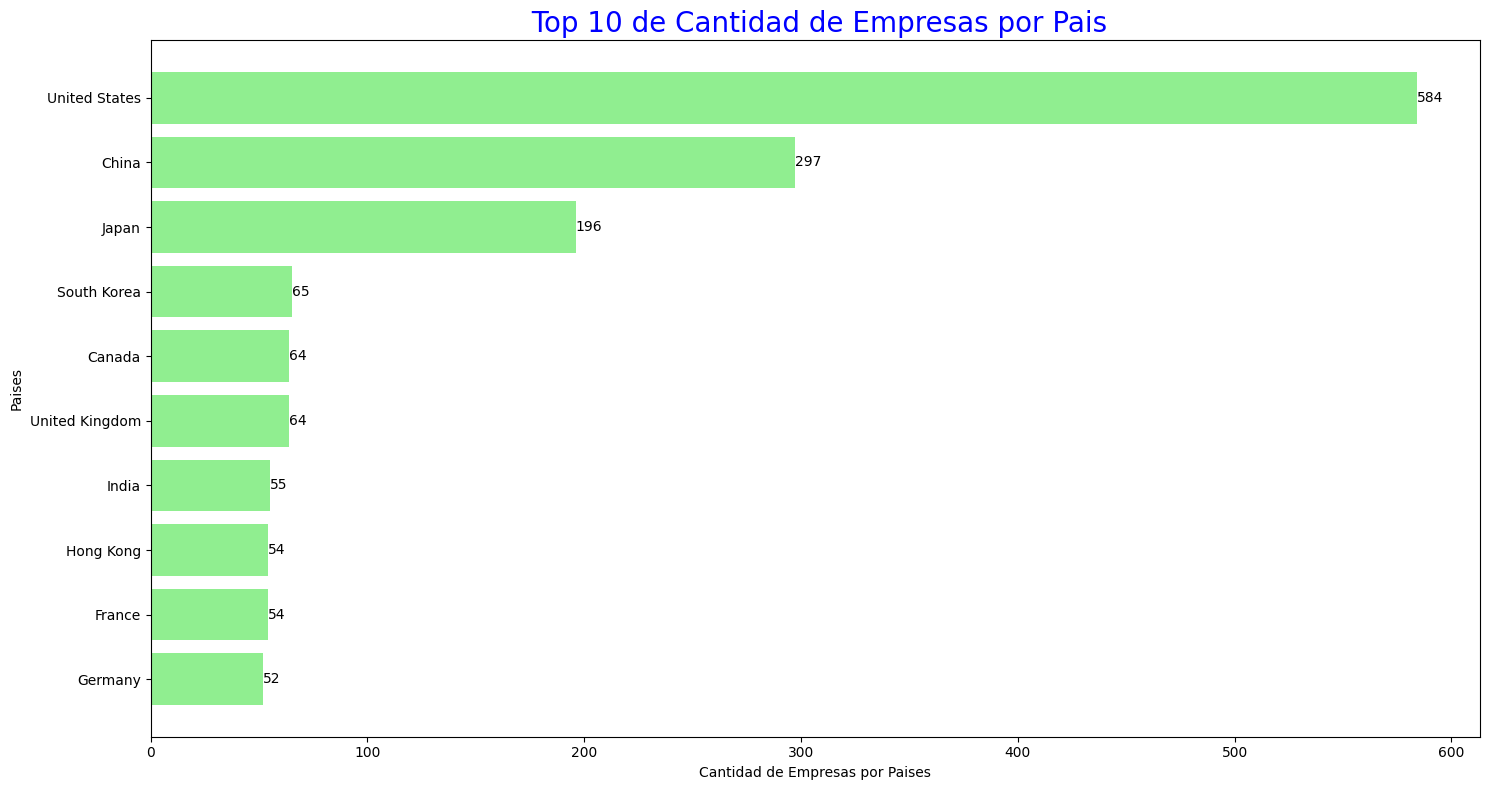

In [326]:
plt.figure(figsize=(15, 8))
df_paises_top10_empresas_22=df_paises_top10_empresas_22.sort_values(by='Cantidad Empresas por País', ascending=True)
fig= plt.barh(df_paises_top10_empresas_22['Pais'], df_paises_top10_empresas_22['Cantidad Empresas por País'], color='lightgreen')

plt.xlabel('Cantidad de Empresas por Paises')
plt.ylabel('Paises')
plt.title(' Top 10 de Cantidad de Empresas por Pais', fontsize= 20, color='b')

for index, value in enumerate(df_paises_top10_empresas_22['Cantidad Empresas por País']):
    plt.text(value, index, str(value), ha='left', va='center', color='black')

plt.tight_layout()
plt.savefig('top_10_cant_emp_pais.jpg')
plt.show()


2. ¿Cuál es el Top 4 de países con más empresas en el área de tecnología y de telecomunicaciones?



In [233]:
top_empresas_2022_tecnologia

,Pais
United States,21
China,14
Japan,11
Taiwan,11


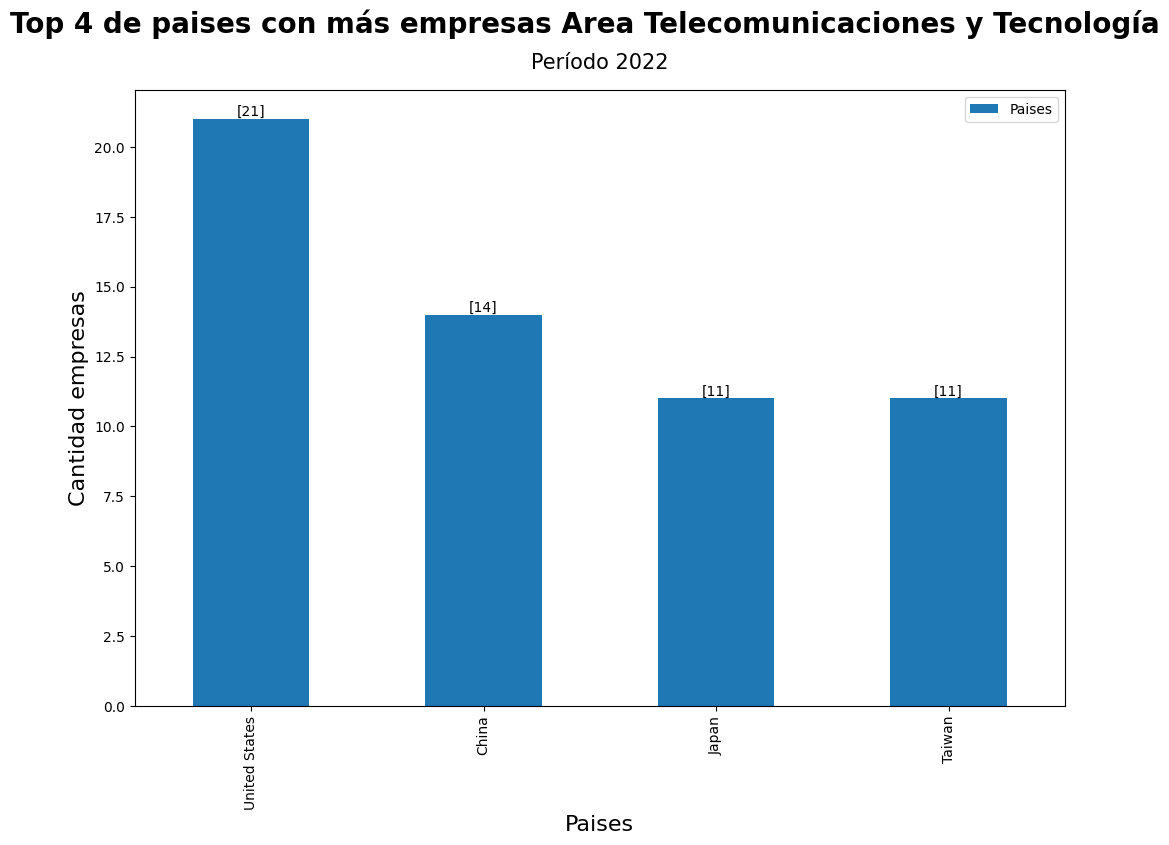

In [327]:
plt.figure(figsize=(12, 8))
cmap = plt.colormaps['viridis']
plt.set_cmap('viridis')
top_empresas_2022_tecnologia['Pais'].plot.bar()
plt.suptitle('Top 4 de paises con más empresas Area Telecomunicaciones y Tecnología',fontsize=20,weight='bold')
plt.title('Período 2022',fontsize=15,pad=15)
plt.ylabel('Cantidad empresas', fontsize=16)
plt.xlabel('Paises', fontsize=16)
plt.legend(['Paises'])

for index, value in enumerate(top_empresas_2022_tecnologia.values):
    plt.text(index, value, str(value), ha='center', va='bottom', color='black')

plt.savefig('top_4_emp_telytec.jpg')

3. ¿Cuál fue el margen de pérdida de las 5 empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento?


In [235]:
margen_perdidas_hoteles

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente,Margen Perdidas %
374,1220,Carnival Corporation,"Hotels, Restaurants & Leisure",United States,3506,-9419.0,53281,21455,-268.65,-17.68,2022,USA,North America,54.66
411,1376,Royal Caribbean Group,"Hotels, Restaurants & Leisure",United States,1532,-5260.5,32258,20821,-343.37,-16.31,2022,USA,North America,30.53
361,1172,Caesars Entertainment,"Hotels, Restaurants & Leisure",United States,9477,-1019.0,38031,14261,-10.75,-2.68,2022,USA,North America,5.91
466,1529,Las Vegas Sands,"Hotels, Restaurants & Leisure",United States,4234,-961.0,20059,27809,-22.70,-4.79,2022,USA,North America,5.58
1799,1316,Flutter Entertainment,"Hotels, Restaurants & Leisure",Ireland,8302,-571.9,22722,18655,-6.89,-2.52,2022,IRL,Europe,3.32


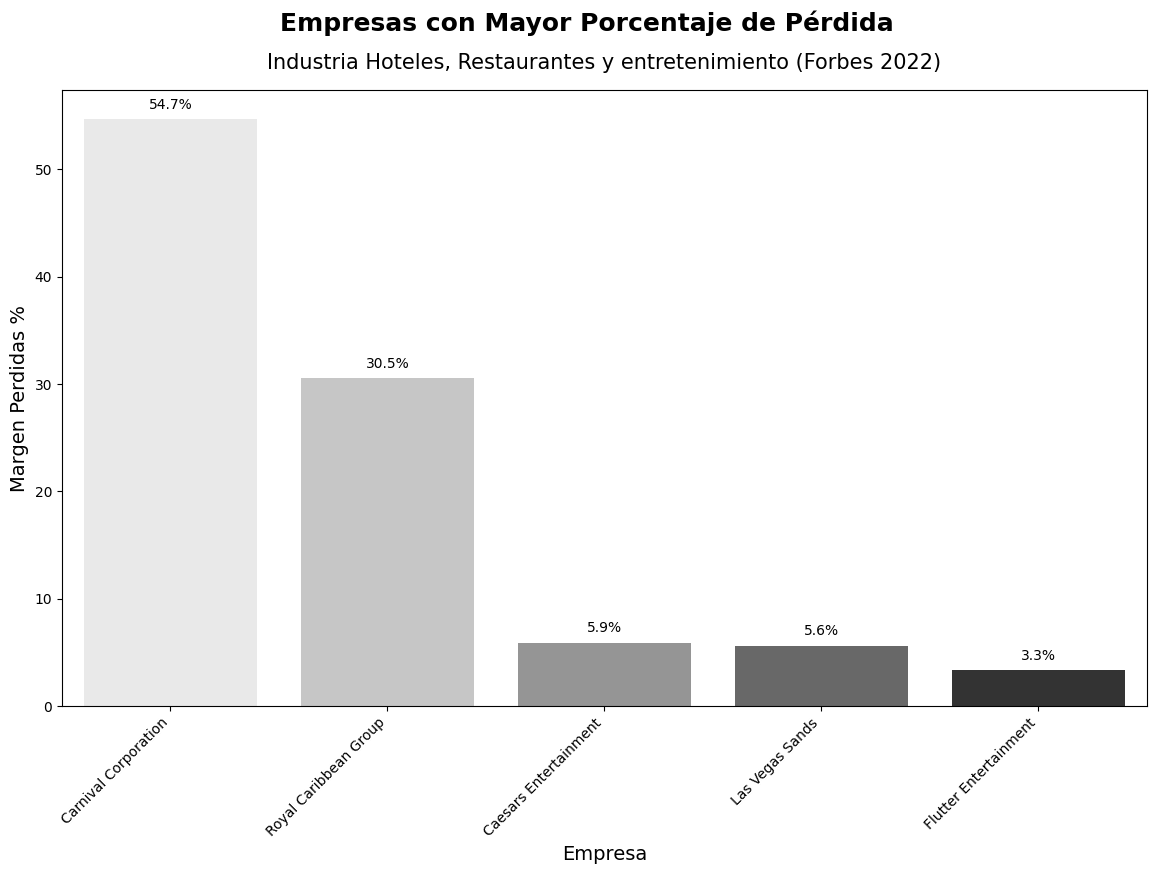

In [329]:
plt.figure(figsize=(14, 8))
ax=sns.barplot(x=(margen_perdidas_hoteles['Empresa']).index, y=(margen_perdidas_hoteles['Margen Perdidas %']).values,
                  palette='Greys', saturation=0.75, width=0.8,order=(margen_perdidas_hoteles['Margen Perdidas %']).sort_values(ascending=False).index)

ax.set_xticklabels(margen_perdidas_hoteles['Empresa'], rotation=45, ha='right')
plt.xlabel('Empresa', fontsize=14)
plt.ylabel('Margen Perdidas %', fontsize=14)
plt.suptitle('Empresas con Mayor Porcentaje de Pérdida',fontsize=18,weight='bold')
plt.title('Industria Hoteles, Restaurantes y entretenimiento (Forbes 2022)',fontsize=15,pad=15)

for p in ax.patches:
    width = p.get_width()
    value = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + value +1
    ax.annotate(f'{value:.1f}%', (x, y), ha='center')

plt.savefig('mayor_perd_emp_hotel.jpg')
plt.show()

4. Considerando a la Industria Petrolera en Asia, ¿Cuál o cuáles empresas superaron en más del 20% su margen de rentabilidad?



In [237]:
top_empresas_petroleras_asia_2022.head(10)

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
881,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,400376,105363.0,576041,2292077,26.32,18.29,2022,SAU,Asia
1331,134,CNOOC,Oil & Gas Operations,Hong Kong,37769,10905.1,123415,62600,28.87,8.84,2022,HKG,Asia
1487,49,Gazprom,Oil & Gas Operations,Russia,117295,25435.6,360474,63561,21.69,7.06,2022,RUS,Asia
1495,414,Novatek,Oil & Gas Operations,Russia,15403,5874.3,32766,38072,38.14,17.93,2022,RUS,Asia
1499,476,Surgutneftegas,Oil & Gas Operations,Russia,19264,6125.0,83544,10476,31.80,7.33,2022,RUS,Asia
1579,1746,Adani Total Gas,Oil & Gas Operations,India,353,77.4,502,34742,21.93,15.42,2022,IND,Asia
1908,1956,ADNOC Drilling,Oil & Gas Operations,United Arab Emirates,2269,603.9,5096,16178,26.62,11.85,2022,ARE,Asia


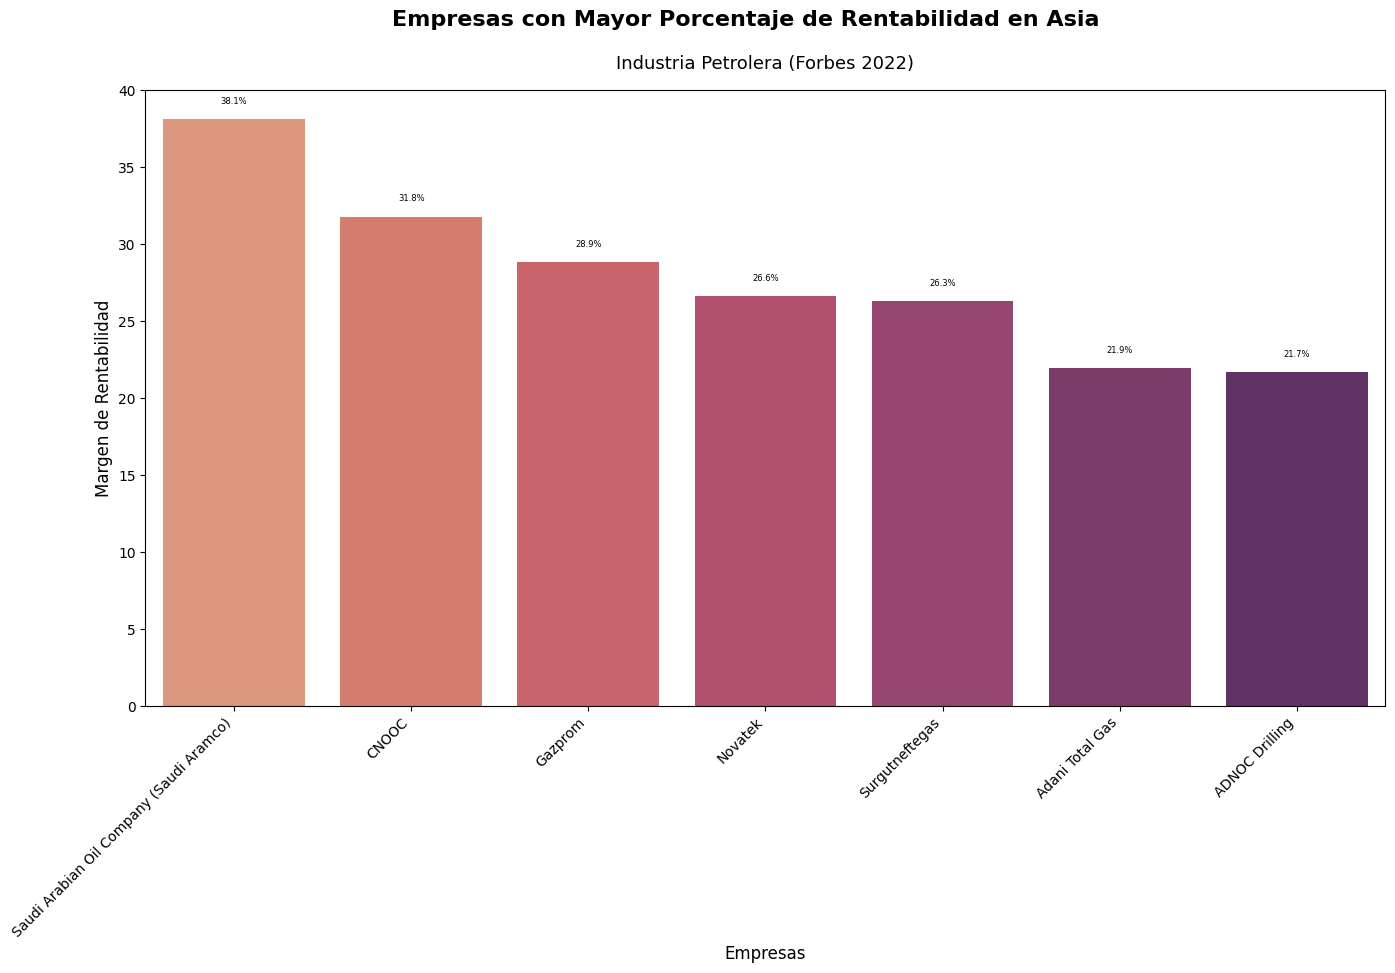

In [330]:
plt.figure(figsize=(16, 8))

ax=sns.barplot(x=(top_empresas_petroleras_asia_2022['Empresa']).index, y=(top_empresas_petroleras_asia_2022['Margen de Rentabilidad']).values,
                  palette='flare', saturation=0.75, width=0.8,order=(top_empresas_petroleras_asia_2022['Margen de Rentabilidad']).sort_values(ascending=False).index)

ax.set_xticklabels(top_empresas_petroleras_asia_2022['Empresa'], rotation=45, ha='right',fontsize=10 )

plt.xlabel('Empresas', fontsize=12)
plt.ylabel('Margen de Rentabilidad', fontsize=12)
plt.suptitle('Empresas con Mayor Porcentaje de Rentabilidad en Asia',fontsize=16,weight='bold')
plt.title('Industria Petrolera (Forbes 2022)',fontsize=13,pad=15)

for p in ax.patches:
    width = p.get_width()
    value = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + value +1
    ax.annotate(f'{value:.1f}%', (x, y), ha='center', fontsize=6)

plt.savefig('emp_mayor_rent_asia.jpg')
plt.show()

5. ¿Cuáles fueron las empresas norteamericanas con el mayor porcentaje de rentabilidad por industria?


In [244]:
empresas_mayor_rent_na

,Industria,Empresa,Margen de Rentabilidad
1445,Diversified Financials,Onex,419.58
323,Health Care Equipment & Services,Bio-Rad Laboratories,145.26
229,Business Services & Supplies,Thomson Reuters,90.01
343,Oil & Gas Operations,Chesapeake Energy,86.48
391,Telecommunications Services,Frontier Communications Parent,77.29
1441,Insurance,E-L Financial,70.09
132,Drugs & Biotechnology,Moderna,66.31
1418,IT Software & Services,Shopify,63.20
1433,Materials,Wheaton Precious Metals,62.89
352,Banking,East West Bancorp,47.44


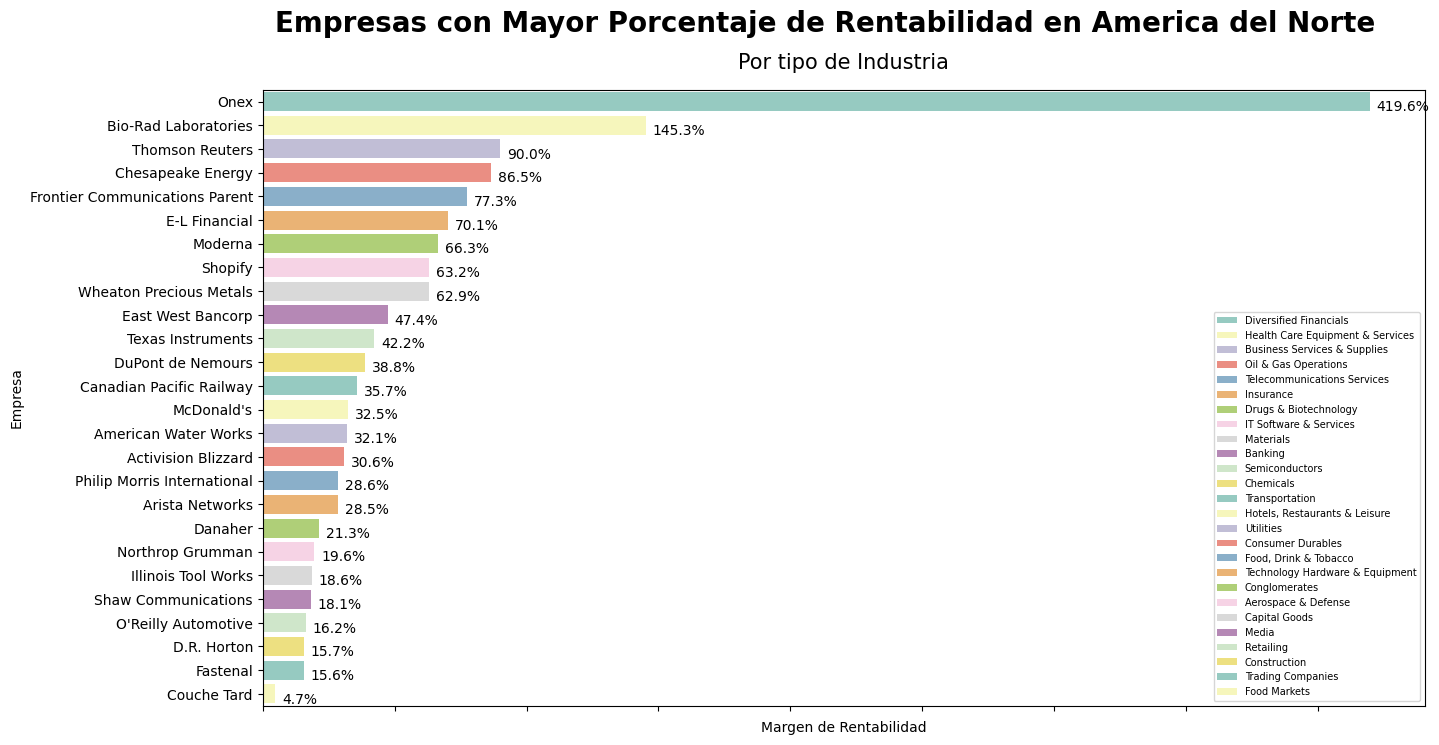

In [331]:
plt.figure(figsize=(15, 8))

ax=sns.barplot(data=empresas_mayor_rent_na, x='Margen de Rentabilidad', y='Empresa', hue='Industria', dodge=False,palette='Set3')
ax.set_xticklabels([])

plt.suptitle('Empresas con Mayor Porcentaje de Rentabilidad en America del Norte',fontsize=20,weight='bold')
plt.title('Por tipo de Industria',fontsize=15,pad=15)
plt.xlabel('Margen de Rentabilidad')
plt.ylabel('Empresa')

plt.legend(fontsize=7,loc='lower right')

for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height()
    ax.annotate(f'{value:.1f}%', (x, y), xytext=(5, 0), textcoords='offset points')
plt.savefig('emp_mayor_rent_anort.jpg')
plt.show()



6. Excluyendo a la industria Bancaria, ¿Cuáles fueron las empresas europeas con  mayores pérdidas registradas por industria a nivel global?



In [245]:
empresas_rent_eur_22

,Industria,Empresa,Ganancias
1193,Insurance,Phoenix Group Holdings,-1182.8
1322,Construction,Unibail-Rodamco,-1149.0
1309,Trading Companies,Finatis,-582.7
1799,"Hotels, Restaurants & Leisure",Flutter Entertainment,-571.9
1249,Capital Goods,Siemens Energy,-541.3
1605,Business Services & Supplies,Amadeus IT Group,-148.3
1603,Transportation,Aena,-71.0
1191,Consumer Durables,Reckitt Benckiser Group,-44.0
1819,IT Software & Services,Spotify Technology,-38.6
1530,Telecommunications Services,Sistema,-9.8


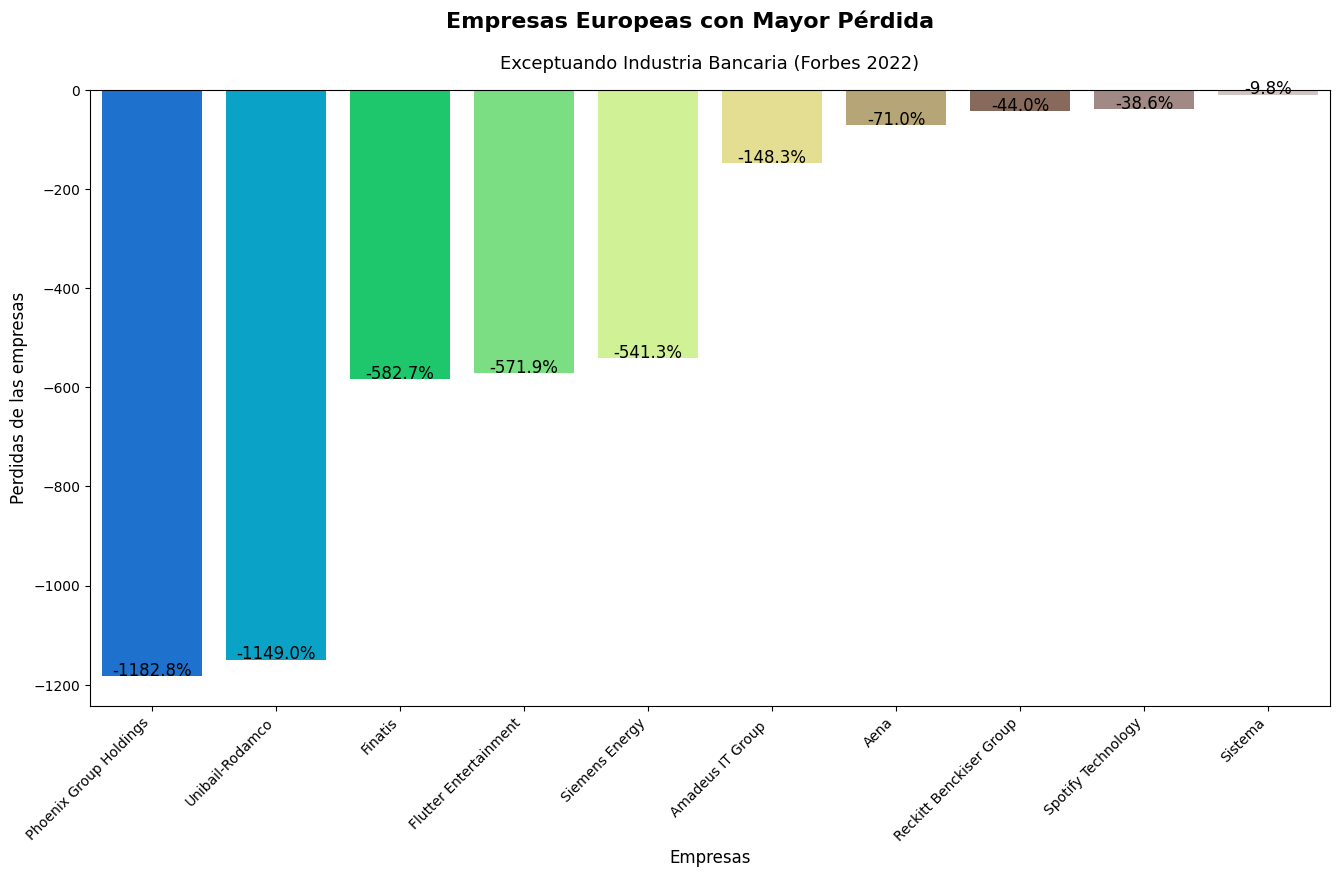

In [332]:
plt.figure(figsize=(16, 8))

ax=sns.barplot(x=(empresas_rent_eur_22['Empresa']).index, y=(empresas_rent_eur_22['Ganancias']).values,
                  palette='terrain',saturation=0.9, width=0.8,order=(empresas_rent_eur_22['Ganancias']).sort_values(ascending=True).index)

ax.set_xticklabels(empresas_rent_eur_22['Empresa'], rotation=45, ha='right',fontsize=10 )

plt.xlabel('Empresas', fontsize=12)
plt.ylabel('Perdidas de las empresas', fontsize=12)
plt.suptitle('Empresas Europeas con Mayor Pérdida',fontsize=16,weight='bold')
plt.title('Exceptuando Industria Bancaria (Forbes 2022)',fontsize=13,pad=15)

for p in ax.patches:
    width = p.get_width()
    value = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + value +1
    ax.annotate(f'{value:.1f}%', (x, y), ha='center', fontsize=12)
plt.savefig('emp_mayor_perd_europ.jpg')
plt.show()

7. ¿Cuál fue la distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 30000 millones de dólares?



In [261]:
top_empresas_bank_22

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
1812,1277,Grupo Inbursa,Banking,Mexico,3451,1029.7,27900,11277,29.84,3.69,2022,MEX,North America
2026,1524,Halyk Bank,Banking,Kazakhstan,2933,1083.6,27809,2967,36.95,3.90,2022,KAZ,Europe
2027,1524,Halyk Bank,Banking,Kazakhstan,2933,1083.6,27809,2967,36.95,3.90,2022,KAZ,Asia
2007,1875,Vietnam Technological & Commercial Joint Stock...,Banking,Vietnam,2073,787.1,24955,6741,37.97,3.15,2022,VNM,Asia


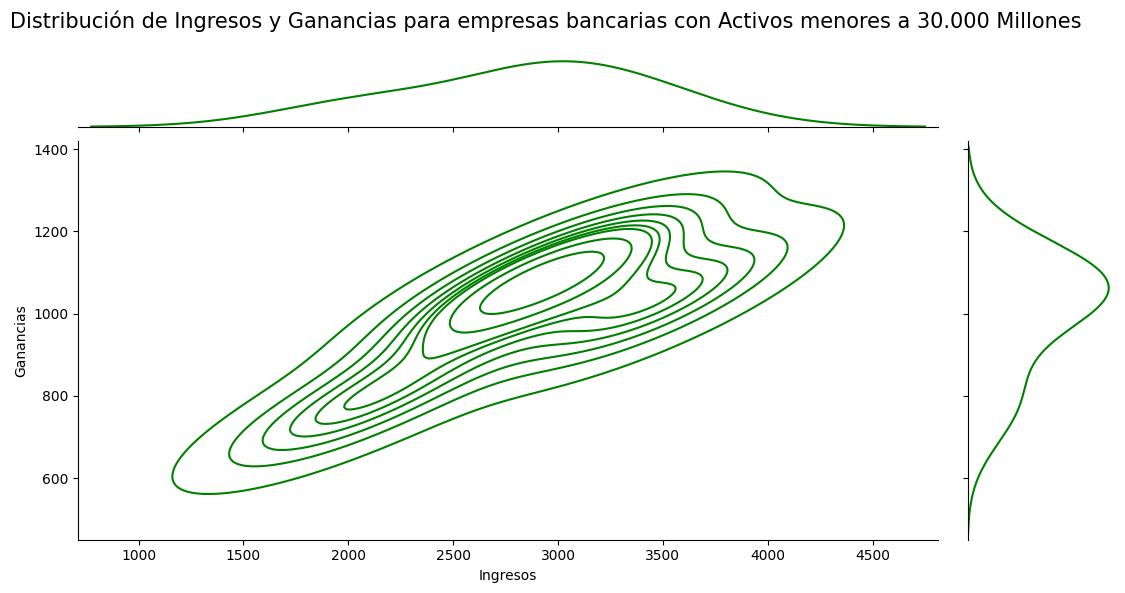

In [333]:
ax= sns.jointplot(x='Ingresos', y='Ganancias', data=top_empresas_bank_22, kind='kde', color='green')
ax.figure.set_size_inches(12,6)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Distribución de Ingresos y Ganancias para empresas bancarias con Activos menores a 30.000 Millones', fontsize= 15);
plt.savefig('dist_ing_gan_act_30.jpg')

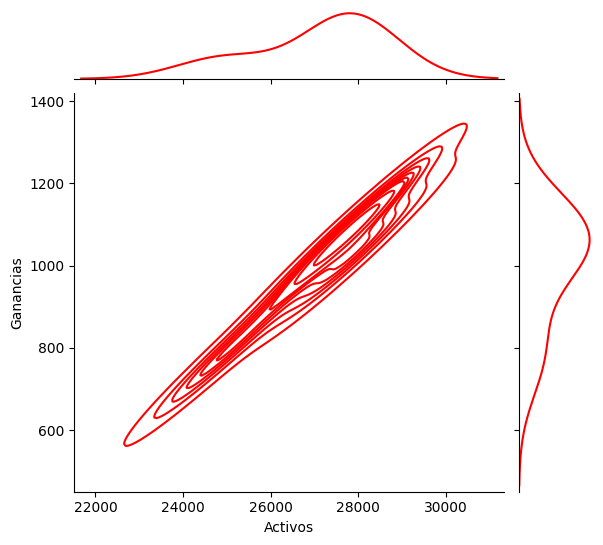

In [334]:
sns.jointplot(x='Activos', y='Ganancias', data=top_empresas_bank_22, kind='kde', color='red');
ax.figure.set_size_inches(12,6)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Distribución de Activos y Ganancias para empresas bancarias con Activos menores a 30.000 Millones', fontsize= 15);
plt.savefig('dist_act_gan_act_30.jpg')

8. Considerando el histórico de valores de las acciones en el año 2022 de las 5 empresas de tu elección (Paso 2), Indica ¿Cuál fue la mejor semana para comprar y cuál para vender respectivamente? (Se compra cuando el precio es bajo, y se vende cuando el precio es alto)

In [266]:
df_semana_general.head()

,Apertura,Cierre,Máximo,Mínimo
Fecha,,,,
2022-01-09,62.864,62.958,64.434000,61.477000
2022-01-16,61.558,61.286,62.284000,60.192020
2022-01-23,57.495,55.740,58.053875,55.441425
2022-01-30,52.133,51.716,52.752660,50.392980
2022-02-06,52.498,52.940,53.762000,51.367000


In [267]:
fila_maximo = df_semana_general['Máximo'].idxmax()
fila_minimo = df_semana_general['Mínimo'].idxmin()

In [268]:
semana_maxima = (df_semana_general.loc[fila_maximo])
semana_minima = (df_semana_general.loc[fila_minimo])

In [269]:
mejor_fecha_venta_general=mejor_fecha_vender_n.transpose()
mejor_fecha_venta_general

,Apertura,Cierre,Máximo,Mínimo
2022-01-16,10.988,10.9256,11.07998,10.894


In [270]:
valor_maximo= mejor_fecha_venta_general['Máximo']

In [271]:
mejor_fecha_compra_general=mejor_fecha_comprar_n.transpose()
mejor_fecha_compra_general

,Apertura,Cierre,Máximo,Mínimo
2022-10-23,6.0629,6.11,6.25198,5.9909


In [272]:
valor_minimo= mejor_fecha_compra_general['Mínimo']

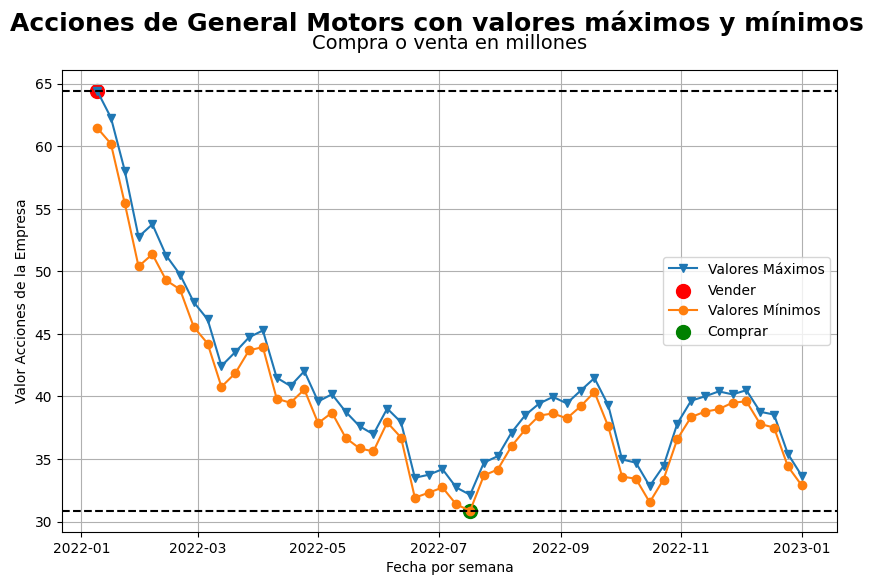

In [335]:
plt.figure(figsize=(10, 6))

plt.plot(df_semana_general.index, df_semana_general['Máximo'], label='Valores Máximos', marker='v', linestyle='-')
plt.scatter(fila_maximo, df_semana_general.loc[fila_maximo]['Máximo'], color='red', label='Vender', s=100)

plt.plot(df_semana_general.index, df_semana_general['Mínimo'], label='Valores Mínimos', marker='o', linestyle='-')
plt.scatter(fila_minimo, df_semana_general.loc[fila_minimo]['Mínimo'], color='green', label='Comprar', s=100)

plt.suptitle('Acciones de General Motors con valores máximos y mínimos', fontsize=18, fontweight='bold')
plt.title('Compra o venta en millones',fontsize=14,pad=15)

plt.xlabel('Fecha por semana')
plt.ylabel('Valor Acciones de la Empresa')
plt.legend()
plt.grid()

plt.axhline(max(df_semana_general['Máximo']), color = 'k', linestyle = '--')
plt.axhline(min(df_semana_general['Mínimo']), color = 'k', linestyle = '--');
plt.savefig('emp_general_compra_venta.jpg')

Grafico 8.2 Empresa Ford

In [274]:
df_semana_ford_22.head()

,Apertura,Cierre,Máximo,Mínimo
Fecha,,,,
2022-01-09,23.3220,23.7280,24.18352,22.87000
2022-01-16,24.3200,24.5760,24.95600,23.86200
2022-01-23,23.1525,22.2825,23.60750,22.20500
2022-01-30,20.1140,19.8740,20.40400,19.25290
2022-02-06,19.9390,19.8880,20.28800,19.37202


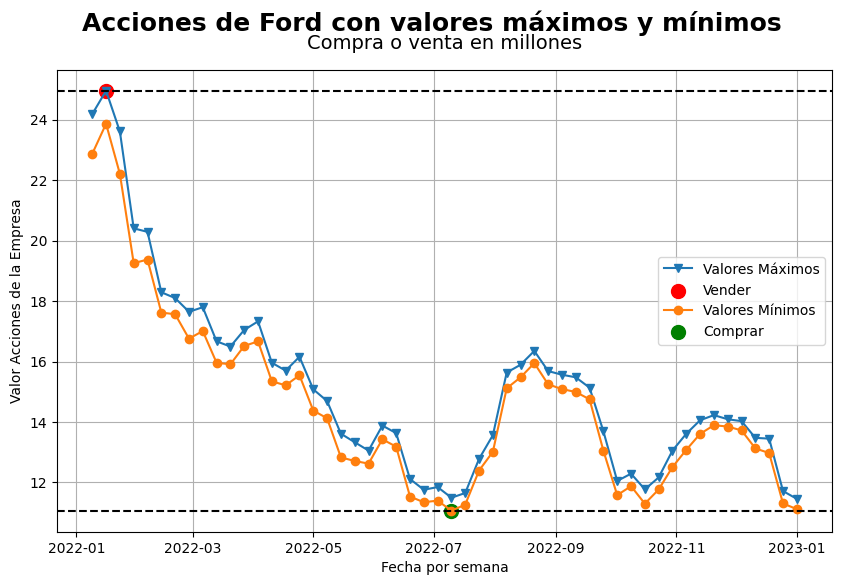

In [336]:
plt.figure(figsize=(10, 6))

plt.plot(df_semana_ford_22.index, df_semana_ford_22['Máximo'], label='Valores Máximos', marker='v', linestyle='-')
plt.scatter(fila_maximo_f, df_semana_ford_22.loc[fila_maximo_f]['Máximo'], color='red', label='Vender', s=100)

plt.plot(df_semana_ford_22.index, df_semana_ford_22['Mínimo'], label='Valores Mínimos', marker='o', linestyle='-')
plt.scatter(fila_minimo_f, df_semana_ford_22.loc[fila_minimo_f]['Mínimo'], color='green', label='Comprar', s=100)

plt.suptitle('Acciones de Ford con valores máximos y mínimos', fontsize=18, fontweight='bold')
plt.title('Compra o venta en millones',fontsize=14,pad=15)

plt.xlabel('Fecha por semana')
plt.ylabel('Valor Acciones de la Empresa')
plt.legend()
plt.grid()

plt.axhline(max(df_semana_ford_22['Máximo']), color = 'k', linestyle = '--')
plt.axhline(min(df_semana_ford_22['Mínimo']), color = 'k', linestyle = '--');
plt.savefig('emp_ford_compra_venta.jpg')

Grafico 8.3 Empresa Toyota

In [276]:
df_semana_toyota_22.head()

,Apertura,Cierre,Máximo,Mínimo
Fecha,,,,
2022-01-09,196.2000,196.5240,198.60428,193.84600
2022-01-16,205.7860,206.1840,207.15074,204.28052
2022-01-23,204.6150,202.7825,205.48625,202.27010
2022-01-30,194.6692,194.3940,196.41920,191.18800
2022-02-06,197.6460,198.1900,199.01454,196.29990


In [277]:
valor_maximo_t

2022-01-16    207.15074
Name: Máximo, dtype: float64

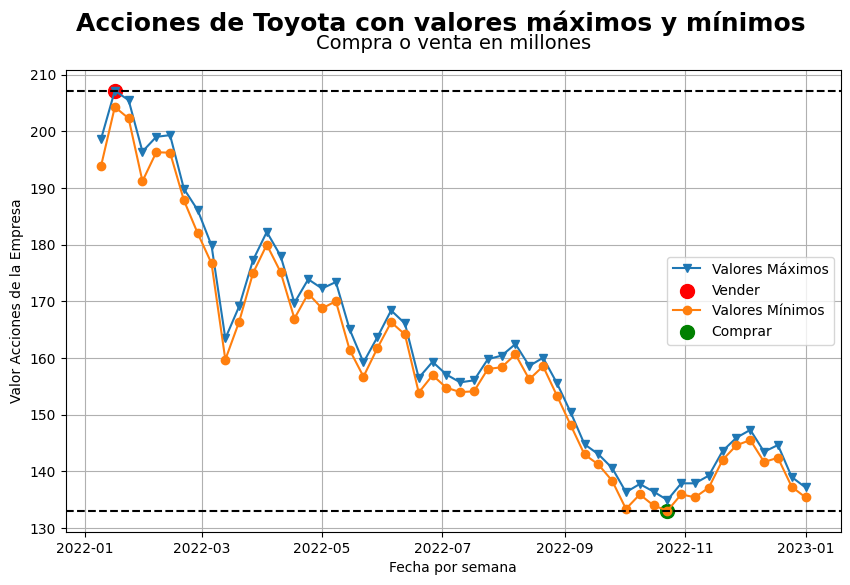

In [340]:
plt.figure(figsize=(10, 6))

plt.plot(df_semana_toyota_22.index, df_semana_toyota_22['Máximo'], label='Valores Máximos', marker='v', linestyle='-')
plt.scatter(fila_maximo_t, df_semana_toyota_22.loc[fila_maximo_t]['Máximo'], color='red', label='Vender', s=100)

plt.plot(df_semana_toyota_22.index, df_semana_toyota_22['Mínimo'], label='Valores Mínimos', marker='o', linestyle='-')
plt.scatter(fila_minimo_t, df_semana_toyota_22.loc[fila_minimo_t]['Mínimo'], color='green', label='Comprar', s=100)

plt.suptitle('Acciones de Toyota con valores máximos y mínimos', fontsize=18, fontweight='bold')
plt.title('Compra o venta en millones',fontsize=14,pad=15)

plt.xlabel('Fecha por semana')
plt.ylabel('Valor Acciones de la Empresa')
plt.legend()
plt.grid()

plt.axhline(max(df_semana_toyota_22['Máximo']), color = 'k', linestyle = '--')
plt.axhline(min(df_semana_toyota_22['Mínimo']), color = 'k', linestyle = '--')

plt.savefig('emp_toyota_compra_venta.jpg');

Grafico 8.4 Empresa Honda

In [279]:
df_semana_honda_22.head()

,Apertura,Cierre,Máximo,Mínimo
Fecha,,,,
2022-01-09,29.322,29.412,29.60598,29.13200
2022-01-16,30.318,30.446,30.53900,30.17402
2022-01-23,30.260,29.860,30.31000,29.79295
2022-01-30,29.362,29.340,29.56196,28.91900
2022-02-06,29.434,29.592,29.68780,29.28800


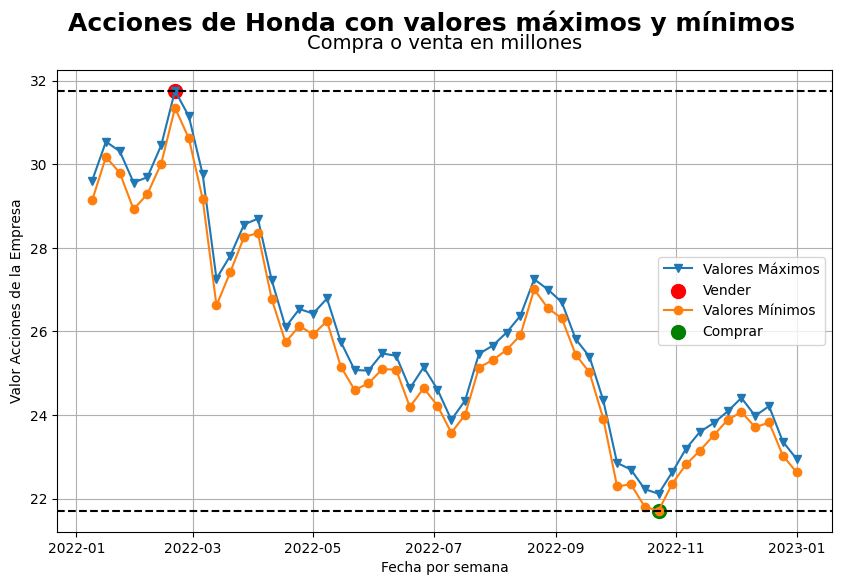

In [338]:
plt.figure(figsize=(10, 6))

plt.plot(df_semana_honda_22.index, df_semana_honda_22['Máximo'], label='Valores Máximos', marker='v', linestyle='-')
plt.scatter(fila_maximo_h, df_semana_honda_22.loc[fila_maximo_h]['Máximo'], color='red', label='Vender', s=100)

plt.plot(df_semana_honda_22.index, df_semana_honda_22['Mínimo'], label='Valores Mínimos', marker='o', linestyle='-')
plt.scatter(fila_minimo_h, df_semana_honda_22.loc[fila_minimo_h]['Mínimo'], color='green', label='Comprar', s=100)

plt.suptitle('Acciones de Honda con valores máximos y mínimos', fontsize=18, fontweight='bold')
plt.title('Compra o venta en millones',fontsize=14,pad=15)

plt.xlabel('Fecha por semana')
plt.ylabel('Valor Acciones de la Empresa')
plt.legend()
plt.grid()

plt.axhline(max(df_semana_honda_22['Máximo']), color = 'k', linestyle = '--')
plt.axhline(min(df_semana_honda_22['Mínimo']), color = 'k', linestyle = '--')
plt.savefig('emp_honda_compra_venta.jpg');

Grafico 8.5 Empresa Nissan

In [281]:
df_semana_nissan_22.head()

,Apertura,Cierre,Máximo,Mínimo
Fecha,,,,
2022-01-09,10.436000,10.41400,10.51200,10.3280
2022-01-16,10.988000,10.92560,11.07998,10.8940
2022-01-23,10.813250,10.77750,10.87875,10.7650
2022-01-30,10.505725,10.46500,10.63000,10.4125
2022-02-06,10.539750,10.56625,10.60250,10.5175


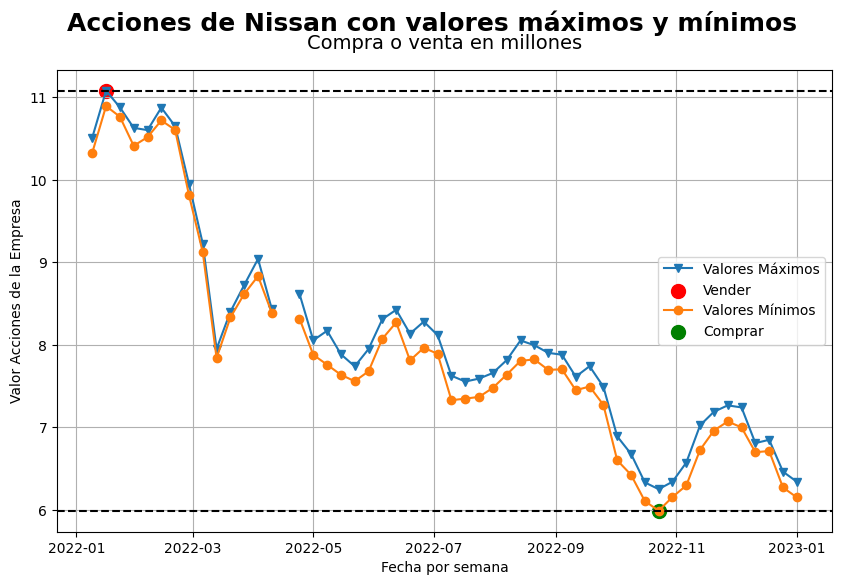

In [352]:
plt.figure(figsize=(10, 6))

plt.plot(df_semana_nissan_22.index, df_semana_nissan_22['Máximo'], label='Valores Máximos', marker='v', linestyle='-')
plt.scatter(fila_maximo_n, df_semana_nissan_22.loc[fila_maximo_n]['Máximo'], color='red', label='Vender', s=100)

plt.plot(df_semana_nissan_22.index, df_semana_nissan_22['Mínimo'], label='Valores Mínimos', marker='o', linestyle='-')
plt.scatter(fila_minimo_n, df_semana_nissan_22.loc[fila_minimo_n]['Mínimo'], color='green', label='Comprar', s=100)

plt.suptitle('Acciones de Nissan con valores máximos y mínimos', fontsize=18, fontweight='bold')
plt.title('Compra o venta en millones',fontsize=14,pad=15)

plt.xlabel('Fecha por semana')
plt.ylabel('Valor Acciones de la Empresa')
plt.legend()
plt.grid()

plt.axhline(max(df_semana_nissan_22['Máximo']), color = 'k', linestyle = '--')
plt.axhline(min(df_semana_nissan_22['Mínimo']), color = 'k', linestyle = '--')
plt.savefig('emp_nissan_compra_venta.jpg');

##Cuestionario B
Las siguientes preguntas se refieren al ranking Forbes 2000 considerando el periodo 2015 - 2022:

1. ¿Cuál es el Top 10 de países con más empresas en Forbes para el periodo indicado?

In [283]:
df_paises_top10_empresas_15_2022


,Pais,Cantidad Empresas por País
19,Germany,418
23,India,440
21,Hong Kong,449
8,Canada,451
18,France,460
57,South Korea,511
65,United Kingdom,658
28,Japan,1745
11,China,1918
66,United States,4616


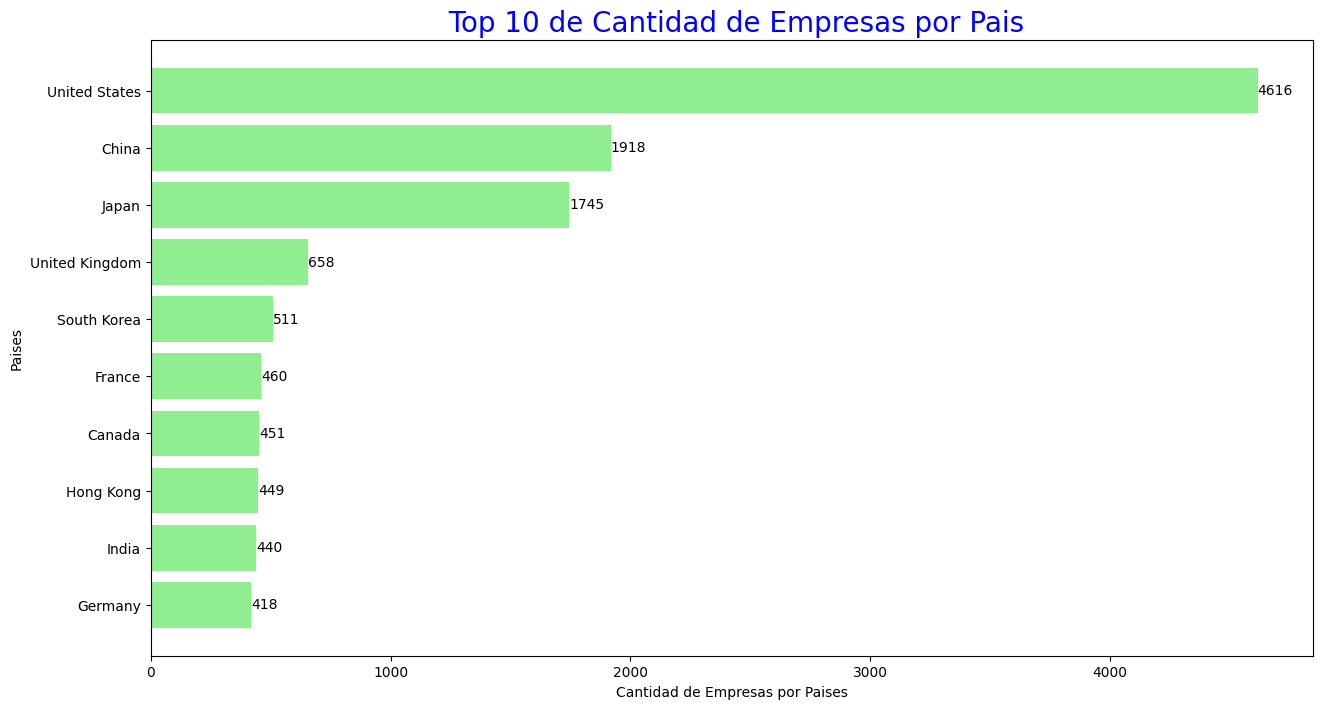

In [341]:
plt.figure(figsize=(15, 8))
df_paises_top10_empresas_15_2022=df_paises_top10_empresas_15_2022.sort_values(by='Cantidad Empresas por País', ascending=True)
fig= plt.barh(df_paises_top10_empresas_15_2022['Pais'], df_paises_top10_empresas_15_2022['Cantidad Empresas por País'], color='lightgreen')

plt.xlabel('Cantidad de Empresas por Paises')
plt.ylabel('Paises')
plt.title(' Top 10 de Cantidad de Empresas por Pais', fontsize= 20, color='b')

for index, value in enumerate(df_paises_top10_empresas_15_2022['Cantidad Empresas por País']):
    plt.text(value, index, str(value), ha='left', va='center', color='black')

plt.savefig('top_10_cant_emp_pais_15_22.jpg')

 2. ¿Cuál es el Top 5 de países con más empresas en el área de tecnología y de telecomunicaciones?

In [285]:
top_empresas_2015_22_tecnologia

,Pais
United States,135
China,79
Taiwan,69
Japan,56


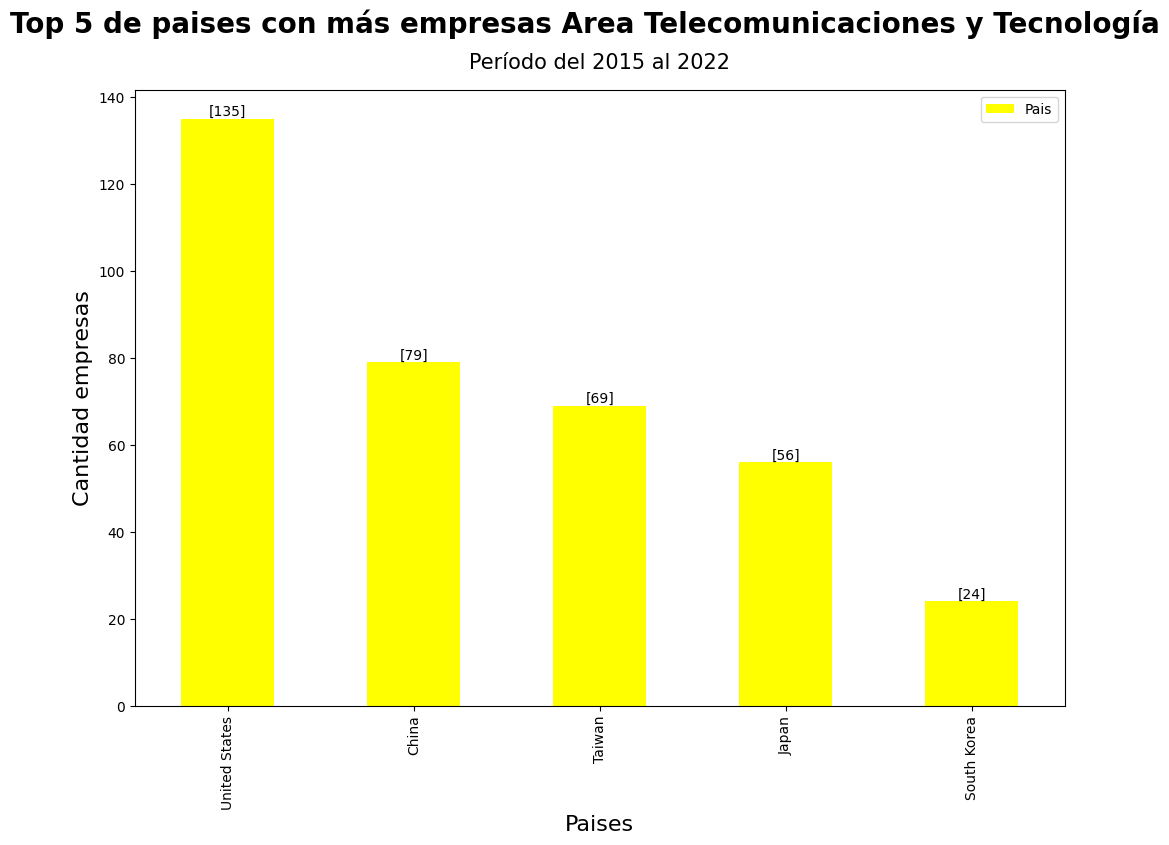

In [351]:
plt.figure(figsize=(12, 8))

plt.set_cmap('viridis')
top_empresas_2015_22_tecnologia['Pais'].plot.bar(color='yellow')
plt.suptitle('Top 5 de paises con más empresas Area Telecomunicaciones y Tecnología',fontsize=20,weight='bold')
plt.title('Período del 2015 al 2022',fontsize=15,pad=15)
plt.ylabel('Cantidad empresas', fontsize=16)
plt.xlabel('Paises', fontsize=16)
plt.legend()

for index, value in enumerate(top_empresas_2015_22_tecnologia.values):
    plt.text(index, value, str(value), ha='center', va='bottom', color='black')

plt.savefig('top_5_emp_telytec.jpg')

3. ¿Cuál fue el margen de pérdida de las 10 empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento?

In [287]:
margen_perd_hoteles=margen_perd_hoteles.head(10)

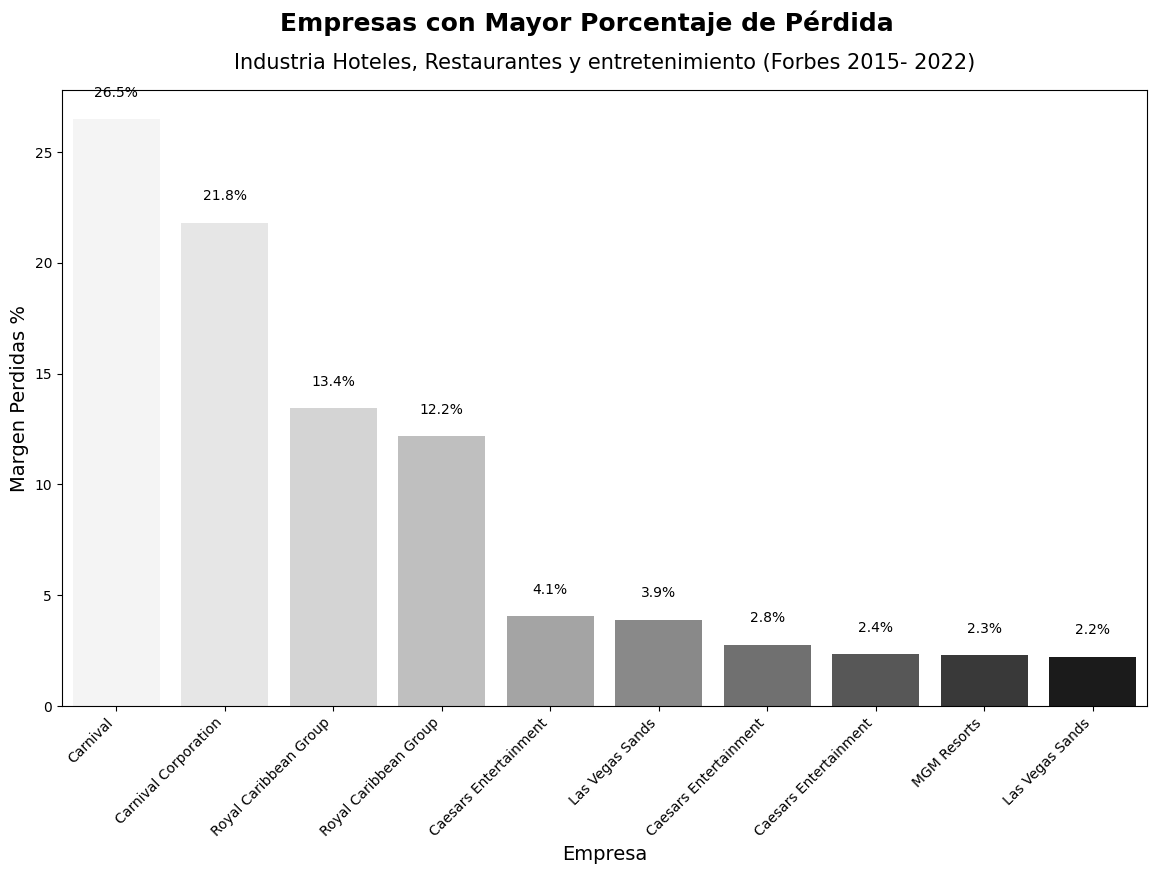

In [343]:
plt.figure(figsize=(14, 8))
ax=sns.barplot(x=(margen_perd_hoteles['Empresa']).index, y=(margen_perd_hoteles['Margen Perdidas %']).values,
                  palette='Greys', saturation=0.75, width=0.8,order=(margen_perd_hoteles['Margen Perdidas %']).sort_values(ascending=False).index)

ax.set_xticklabels(margen_perd_hoteles['Empresa'], rotation=45, ha='right')
plt.xlabel('Empresa', fontsize=14)
plt.ylabel('Margen Perdidas %', fontsize=14)
plt.suptitle('Empresas con Mayor Porcentaje de Pérdida',fontsize=18,weight='bold')
plt.title('Industria Hoteles, Restaurantes y entretenimiento (Forbes 2015- 2022)',fontsize=15,pad=15)

for p in ax.patches:
    width = p.get_width()
    value = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + value +1
    ax.annotate(f'{value:.1f}%', (x, y), ha='center')
plt.savefig('emp_mayor_perd_hotel_15_22.jpg')
plt.show()

4. Considerando a la Industria Petrolera en las Américas, ¿Cuál o cuáles empresas superaron en más del 20% la rentabilidad de sus activos?

In [289]:
top_empresas_petroleras_americana_2015_22=top_empresas_petroleras_america_2015_22.head(30)
top_empresas_petroleras_americana_2015_22

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
2062,408,Williams Cos,Oil & Gas Operations,United States,7637.0,2114.0,50563.0,37619.0,27.68,4.18,2015,USA,North America
2066,421,Marathon Oil,Oil & Gas Operations,United States,11604.0,3046.0,36011.0,18837.0,26.25,8.46,2015,USA,North America
2157,772,Noble Energy,Oil & Gas Operations,United States,4931.0,1214.0,22553.0,19644.0,24.62,5.38,2015,USA,North America
2193,898,Pioneer Natural Resources,Oil & Gas Operations,United States,4366.0,919.0,14926.0,25857.0,21.05,6.16,2015,USA,North America
2206,948,Continental Resources,Oil & Gas Operations,United States,4242.0,977.3,15273.0,18220.0,23.04,6.40,2015,USA,North America
2280,1188,Southwestern Energy,Oil & Gas Operations,United States,4062.0,924.2,14925.0,9380.0,22.75,6.19,2015,USA,North America
2323,1349,Antero Resources,Oil & Gas Operations,United States,1809.0,671.4,11573.0,10225.0,37.11,5.80,2015,USA,North America
2379,1577,Range Resources,Oil & Gas Operations,United States,2169.0,623.7,8747.0,9234.0,28.76,7.13,2015,USA,North America
2385,1600,Cimarex Energy,Oil & Gas Operations,United States,2424.0,500.2,8725.0,10801.0,20.64,5.73,2015,USA,North America
2407,1682,Newfield Exploration,Oil & Gas Operations,United States,2266.0,900.0,9598.0,6014.0,39.72,9.38,2015,USA,North America


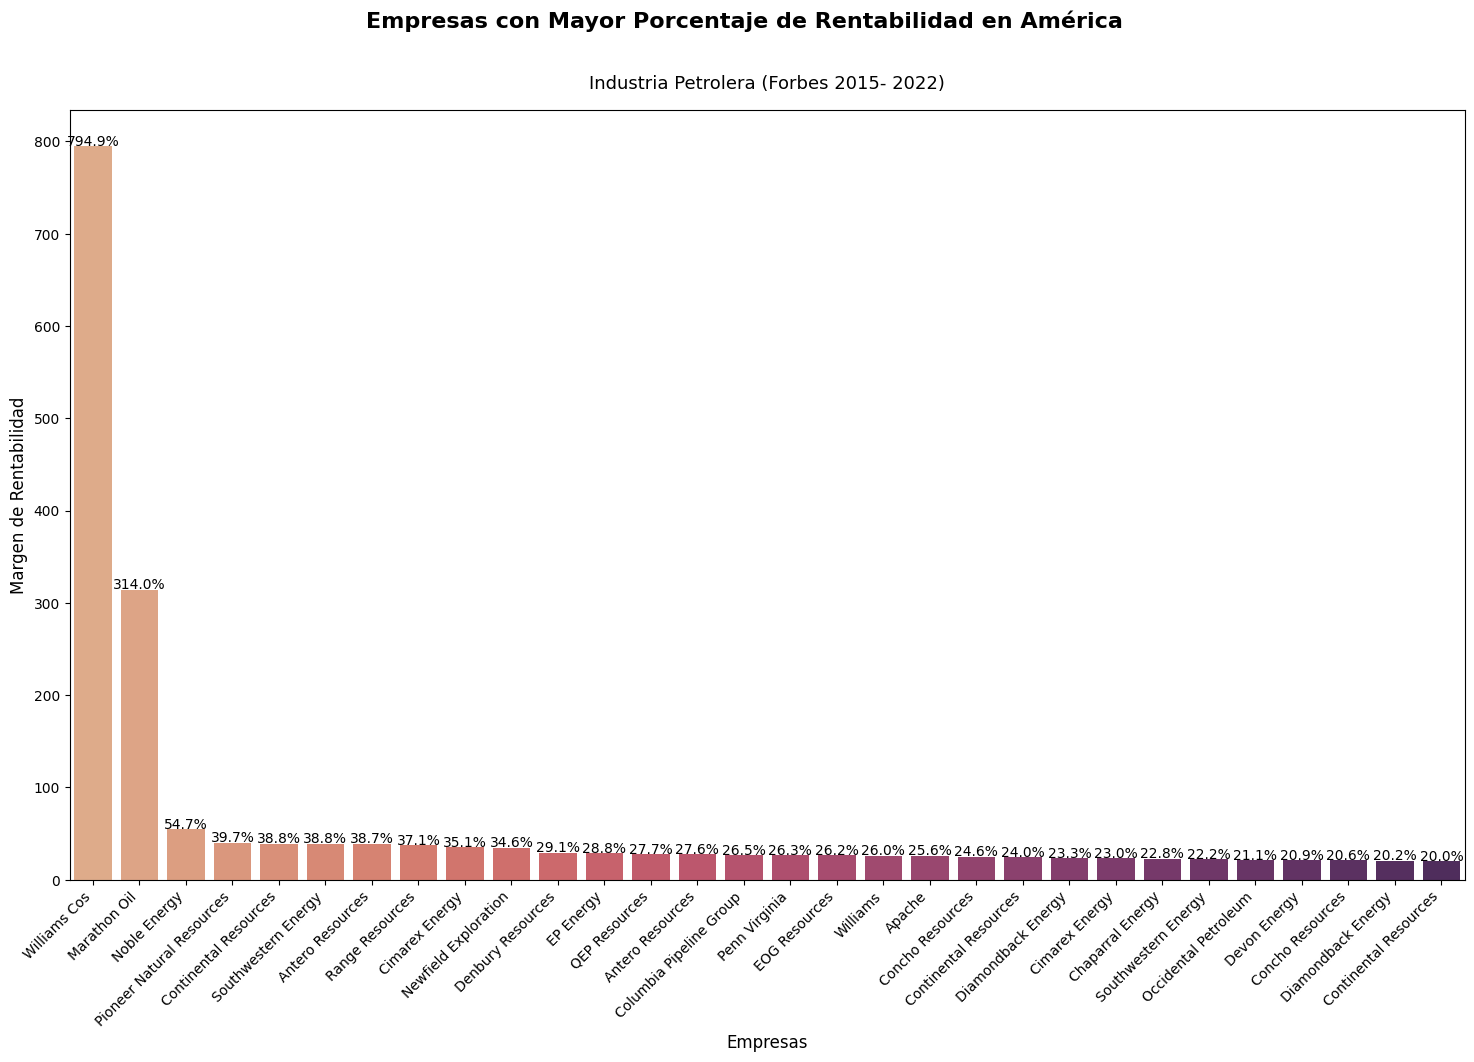

In [344]:
plt.figure(figsize=(18,10))

ax=sns.barplot(x=(top_empresas_petroleras_americana_2015_22['Empresa']).index, y=(top_empresas_petroleras_americana_2015_22['Margen de Rentabilidad']).values,
                  palette='flare', saturation=0.75, width=0.8,order=(top_empresas_petroleras_americana_2015_22['Margen de Rentabilidad']).sort_values(ascending=False).index)

ax.set_xticklabels(top_empresas_petroleras_americana_2015_22['Empresa'], rotation=45, ha='right',fontsize=10 )

plt.xlabel('Empresas', fontsize=12)
plt.ylabel('Margen de Rentabilidad', fontsize=12)
plt.suptitle('Empresas con Mayor Porcentaje de Rentabilidad en América',fontsize=16,weight='bold')
plt.title('Industria Petrolera (Forbes 2015- 2022)',fontsize=13,pad=15)

for p in ax.patches:
    width = p.get_width()
    value = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + value +1
    ax.annotate(f'{value:.1f}%', (x, y), ha='center', fontsize=10)
plt.savefig('emp_mayor_rent_america.jpg')
plt.show()

5. ¿Cuáles fueron las empresas europeas con el mayor porcentaje de rentabilidad por industria?

In [291]:
empresas_rent_europa

,Industria,Empresa,Margen de Rentabilidad
8647,Consumer Durables,Porsche Automobil Holding,9890.26
12402,Diversified Financials,Sofina,2597.80
8976,Real Estate,Great Portland Estates,758.07
13938,Construction,Akelius Residential Property,656.57
12908,Banking,Sparebanken Nord-Norge,406.74
13072,Media,Seat-Pagine Gialle,338.15
10878,Telecommunications Services,Vivendi,257.96
9166,"Food, Drink & Tobacco",British American Tobacco,184.97
8655,Insurance,Deutsche Wohnen,145.58
8885,Telecommunications services,Vodafone,116.73


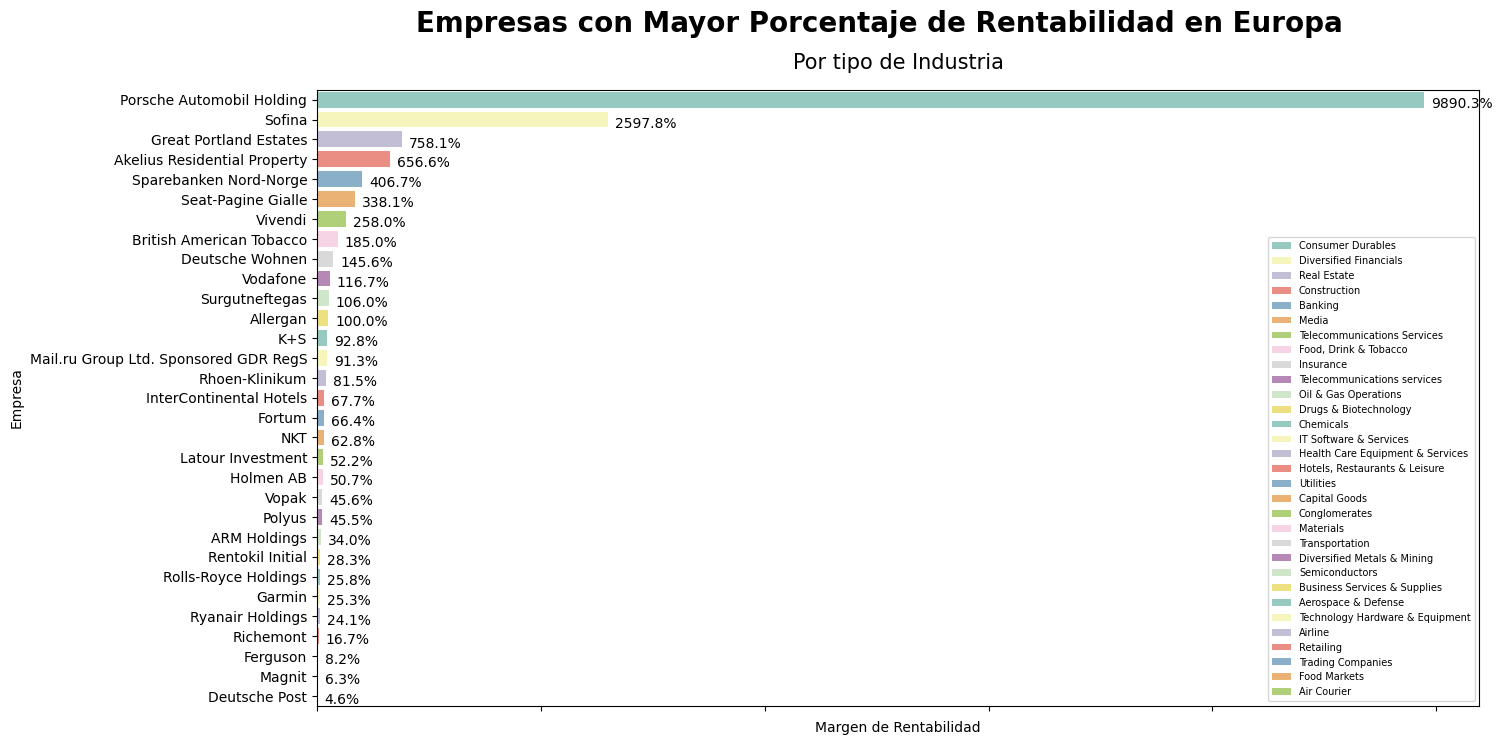

In [345]:
plt.figure(figsize=(15, 8))

ax=sns.barplot(data=empresas_rent_europa, x='Margen de Rentabilidad', y='Empresa', hue='Industria', dodge=False,palette='Set3')
ax.set_xticklabels([])

plt.suptitle('Empresas con Mayor Porcentaje de Rentabilidad en Europa',fontsize=20,weight='bold')
plt.title('Por tipo de Industria',fontsize=15,pad=15)
plt.xlabel('Margen de Rentabilidad')
plt.ylabel('Empresa')

plt.legend(fontsize=7,loc='lower right')

for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height()
    ax.annotate(f'{value:.1f}%', (x, y), xytext=(5, 0), textcoords='offset points')
plt.savefig('emp_mayor_rent_europ.jpg')
plt.show()

6. ¿Cuáles fueron las 10 empresas norteamericanas con mayores pérdidas registradas por industria a nivel global?

In [293]:
df_empr_perd_namer

,Industria,Empresa,Ganancias
4663,Telecommunications Services,Frontier Communications,-643.0
3039,Transportation,XPO Logistics,-243.6
5899,"Hotels, Restaurants & Leisure",Darden Restaurants,-219.2
16039,Semiconductors,Marvell Technology Group,-179.0
5869,Food Markets,Performance Food Group,-174.5
2230,Casinos & Gaming,MGM Resorts,-148.8
5698,Health Care Equipment & Services,Zimmer Biomet,-138.9
4091,Aerospace & Defense,Motorola Solutions,-115.0
13682,Conglomerates,ALFA,-86.6
5911,Trading Companies,Avnet,-76.2


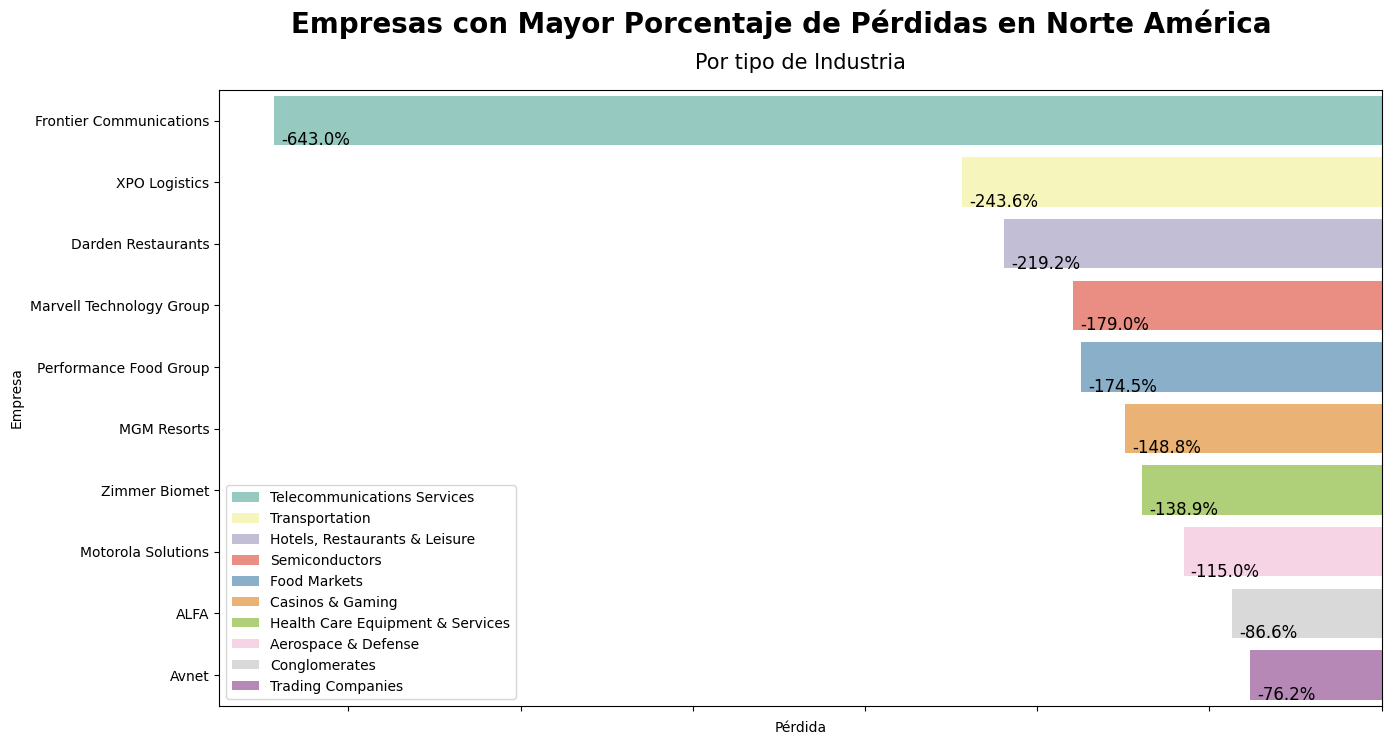

In [346]:
plt.figure(figsize=(15, 8))

ax=sns.barplot(data=df_empr_perd_namer, x='Ganancias', y='Empresa', hue='Industria', dodge=False,palette='Set3')
ax.set_xticklabels([])

plt.suptitle('Empresas con Mayor Porcentaje de Pérdidas en Norte América',fontsize=20,weight='bold')
plt.title('Por tipo de Industria',fontsize=15,pad=15)
plt.xlabel('Pérdida')
plt.ylabel('Empresa')

plt.legend(fontsize=10,loc='lower left')

for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height()
    ax.annotate(f'{value:.1f}%', (x, y), xytext=(5, 0), textcoords='offset points', fontsize=12)
plt.savefig('emp_mayor_perd_anort.jpg')
plt.show()

7. ¿Cuál fue la distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 15000 millones de dólares?

In [295]:
top_empr_bank_2015_22

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,ROA %,Año,CodPais,Continente
14000,1985,IndusInd Bank,Banking,India,1894.0,277.7,14943.0,7793.0,14.66,1.86,2015,IND,Asia
16178,1699,Commercial International Bank,Banking,Egypt,2234.0,596.8,14757.0,4999.0,26.71,4.04,2017,EGY,Africa
15851,1735,"Banco del Caribe, C.A. Banco Universal",Banking,Venezuela,2017.0,502.0,14716.0,82.0,24.89,3.41,2016,VEN,South America
12908,1585,Sparebanken Nord-Norge,Banking,Norway,481.0,1956.4,13700.0,1006.0,406.74,14.28,2021,NOR,Europe
16132,1817,Guaranty Trust Bank,Banking,Nigeria,1472.0,490.8,13343.0,2255.0,33.34,3.68,2016,NGA,Africa
16208,1787,Halyk Bank,Banking,Kazakhstan,1648.0,538.7,13080.0,1075.0,32.69,4.12,2016,KAZ,Europe
16209,1787,Halyk Bank,Banking,Kazakhstan,1648.0,538.7,13080.0,1075.0,32.69,4.12,2016,KAZ,Asia
16128,1785,Guaranty Trust Bank,Banking,Nigeria,1675.0,593.4,12874.0,4515.0,35.43,4.61,2015,NGA,Africa
15645,1840,Grupo Galicia,Banking,Argentina,4185.0,468.5,12495.0,3890.0,11.19,3.75,2016,ARG,South America
16270,1830,Banca Transilvania,Banking,Romania,881.0,610.9,11407.0,2012.0,69.34,5.36,2016,ROU,Europe


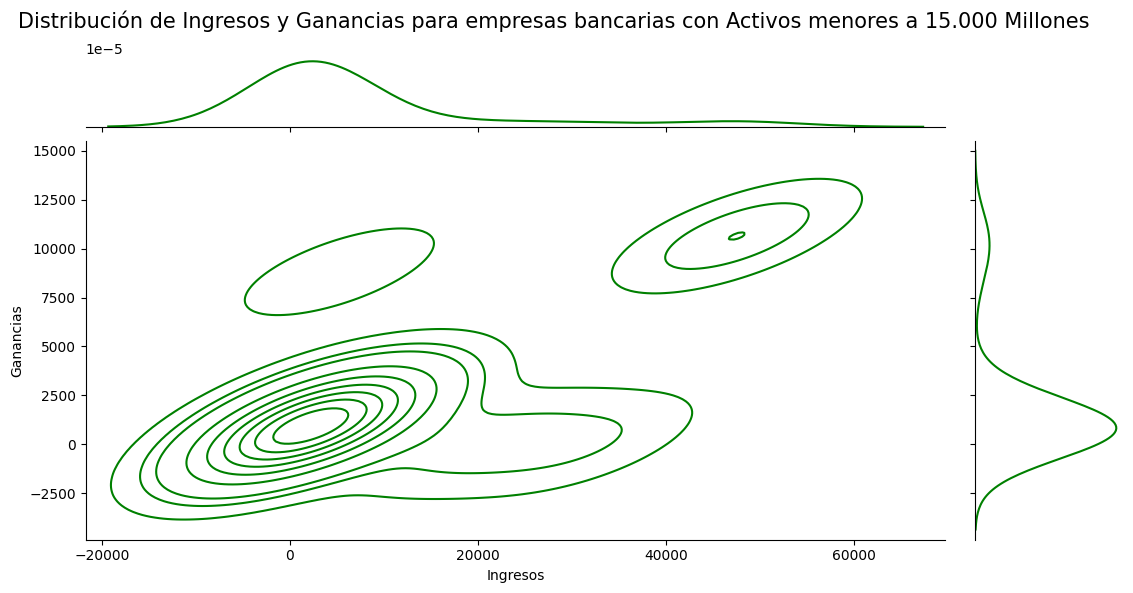

In [347]:
ax= sns.jointplot(x='Ingresos', y='Ganancias', data=top_empr_bank_2015_22, kind='kde', color='green')
ax.figure.set_size_inches(12,6)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Distribución de Ingresos y Ganancias para empresas bancarias con Activos menores a 15.000 Millones', fontsize= 15);
plt.savefig('dist_ing_gan_act_15.jpg')

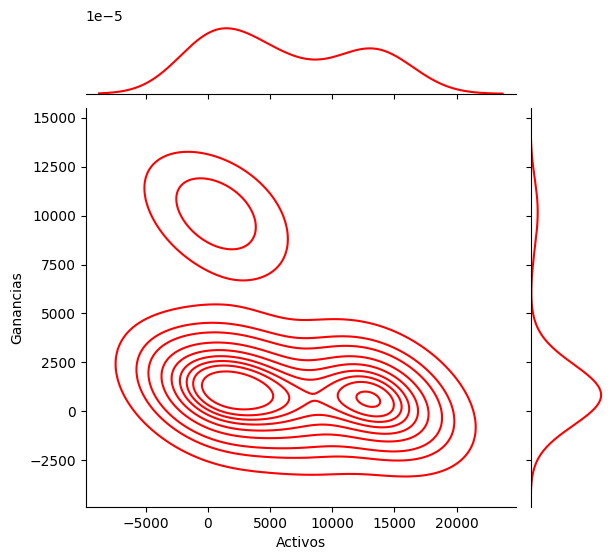

In [348]:
sns.jointplot(x='Activos', y='Ganancias', data=top_empr_bank_2015_22, kind='kde', color='red');
ax.figure.set_size_inches(12,6)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Distribución de Activos y Ganancias para empresas bancarias con Activos menores a 15.000 Millones', fontsize= 15)
plt.savefig('dist_act_gan_act_15.jpg');

8. ¿Cuáles fueron las ganancias anuales de las principales empresas en la Industria automotriz?

In [322]:
top_df_empresas_autom_anual_2015_22 = df_empresas_autom_anual_2015_22.head(25)
top_df_empresas_autom_anual_2015_22

,Empresa,Ganancias,Año
8083,Toyota Motor,28154.4,2022
8834,Mercedes-Benz Group,27192.7,2022
12268,Ford Motor,17937.0,2022
8832,Volkswagen Group,17544.1,2022
8442,Stellantis,16784.1,2022
8835,BMW Group,14635.3,2022
5973,Procter & Gamble,14596.0,2022
10856,LVMH Moët Hennessy Louis Vuitton,14226.3,2022
8622,Daimler,11793.6,2018
8374,Unilever,11077.0,2019


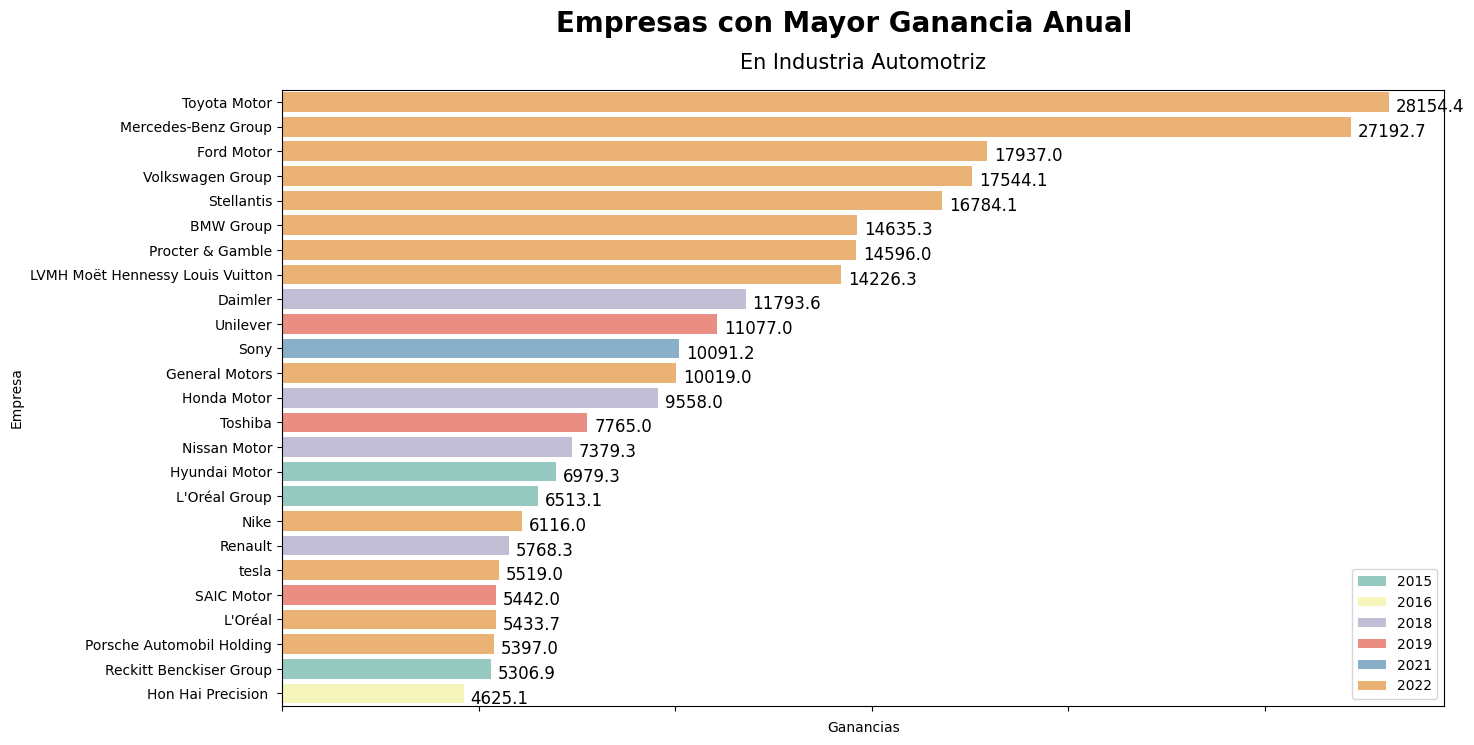

In [349]:
plt.figure(figsize=(15, 8))

ax=sns.barplot(data=top_df_empresas_autom_anual_2015_22, x='Ganancias', y='Empresa', hue='Año', dodge=False,palette='Set3')
ax.set_xticklabels([])

plt.suptitle('Empresas con Mayor Ganancia Anual',fontsize=20,weight='bold')
plt.title('En Industria Automotriz',fontsize=15,pad=15)
plt.xlabel('Ganancias')
plt.ylabel('Empresa')

plt.legend(fontsize=10,loc='lower right')

for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height()
    ax.annotate(f'{value:.1f}', (x, y), xytext=(5, 0), textcoords='offset points', fontsize=12)
plt.savefig('emp_mayor_rent_anual_autom.jpg')
plt.show()